In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from pandas_profiling import ProfileReport
%matplotlib inline

In [15]:
df = pd.read_csv("credit_card.csv")

In [16]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Data processing

### rename columns

In [17]:
# rename the column
# ca_trx is changed into _transaction_number
# purchases_trx is changed into puchase_transaction_number
df.columns = ['cust_id', 'balance', 'balance_frequency', 
              'purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance', 
              'purchase_frequency', 'oneoff_purchase_frequency',
              'purchase_installment_frequency', 'cash_advance_frequency',
               'cash_advance_transaction_number', 'purchase_transaction_number',
               'credit_limit', 'payment', 'minimum_payment', 'percent_full_payment','tenure']

In [18]:
df

cust_id      balance  balance_frequency  purchase  oneoff_purchase  \
0     C10001    40.900749           0.818182     95.40             0.00   
1     C10002  3202.467416           0.909091      0.00             0.00   
2     C10003  2495.148862           1.000000    773.17           773.17   
3     C10004  1666.670542           0.636364   1499.00          1499.00   
4     C10005   817.714335           1.000000     16.00            16.00   
...      ...          ...                ...       ...              ...   
8945  C19186    28.493517           1.000000    291.12             0.00   
8946  C19187    19.183215           1.000000    300.00             0.00   
8947  C19188    23.398673           0.833333    144.40             0.00   
8948  C19189    13.457564           0.833333      0.00             0.00   
8949  C19190   372.708075           0.666667   1093.25          1093.25   

      installment_purchase  cash_advance  purchase_frequency  \
0                    95.40      0.000000            0.166667   
1                     0.00   6442.945483            0.000000   
2                     0.00      0.000000            1.000000   
3                     0.00    205.788017            0.083333   
4                     0.00      0.000000            0.083333   
...                    ...           ...                 ...   
8945                291.12      0.000000            1.000000   
8946                300.00      0.000000            1.000000   
8947                144.40      0.000000            0.833333   
8948                  0.00     36.558778            0.000000   
8949                  0.00    127.040008            0.666667   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                      0.000000                        0.083333   
1                      0.000000                        0.000000   
2                      1.000000                        0.000000   
3                      0.083333                        0.000000   
4                      0.083333                        0.000000   
...                         ...                             ...   
8945                   0.000000                        0.833333   
8946                   0.000000                        0.833333   
8947                   0.000000                        0.666667   
8948                   0.000000                        0.000000   
8949                   0.666667                        0.000000   

      cash_advance_frequency  cash_advance_transaction_number  \
0                   0.000000                                0   
1                   0.250000                                4   
2                   0.000000                                0   
3                   0.083333                                1   
4                   0.000000                                0   
...                      ...                              ...   
8945                0.000000                                0   
8946                0.000000                                0   
8947                0.000000                                0   
8948                0.166667                                2   
8949                0.333333                                2   

      purchase_transaction_number  credit_limit      payment  minimum_payment  \
0                               2        1000.0   201.802084       139.509787   
1                               0        7000.0  4103.032597      1072.340217   
2                              12        7500.0   622.066742       627.284787   
3                               1        7500.0     0.000000              NaN   
4                               1        1200.0   678.334763       244.791237   
...                           ...           ...          ...              ...   
8945                            6        1000.0   325.594462        48.886365   
8946                            6        1000.0   275.861322              NaN   
8947                

In [19]:
df.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchase',
       'oneoff_purchase', 'installment_purchase', 'cash_advance',
       'purchase_frequency', 'oneoff_purchase_frequency',
       'purchase_installment_frequency', 'cash_advance_frequency',
       'cash_advance_transaction_number', 'purchase_transaction_number',
       'credit_limit', 'payment', 'minimum_payment', 'percent_full_payment',
       'tenure'],
      dtype='object')

drop cust_id column

In [20]:
df = df.drop('cust_id', axis=1)

In [21]:
# ProfileReport(df, title="Credit card data report", explorative=True)

In [22]:
df.describe()
# lots of 0 values, may requiring checking

balance  balance_frequency      purchase  oneoff_purchase  \
count   8950.000000        8950.000000   8950.000000      8950.000000   
mean    1564.474828           0.877271   1003.204834       592.437371   
std     2081.531879           0.236904   2136.634782      1659.887917   
min        0.000000           0.000000      0.000000         0.000000   
25%      128.281915           0.888889     39.635000         0.000000   
50%      873.385231           1.000000    361.280000        38.000000   
75%     2054.140036           1.000000   1110.130000       577.405000   
max    19043.138560           1.000000  49039.570000     40761.250000   

       installment_purchase  cash_advance  purchase_frequency  \
count           8950.000000   8950.000000         8950.000000   
mean             411.067645    978.871112            0.490351   
std              904.338115   2097.163877            0.401371   
min                0.000000      0.000000            0.000000   
25%                0.000000      0.000000            0.083333   
50%               89.000000      0.000000            0.500000   
75%              468.637500   1113.821139            0.916667   
max            22500.000000  47137.211760            1.000000   

       oneoff_purchase_frequency  purchase_installment_frequency  \
count                8950.000000                     8950.000000   
mean                    0.202458                        0.364437   
std                     0.298336                        0.397448   
min                     0.000000                        0.000000   
25%                     0.000000                        0.000000   
50%                     0.083333                        0.166667   
75%                     0.300000                        0.750000   
max                     1.000000                        1.000000   

       cash_advance_frequency  cash_advance_transaction_number  \
count             8950.000000                      8950.000000   
mean                 0.135144                         3.248827   
std                  0.200121                         6.824647   
min                  0.000000                         0.000000   
25%                  0.000000                         0.000000   
50%                  0.000000                         0.000000   
75%                  0.222222                         4.000000   
max                  1.500000                       123.000000   

       purchase_transaction_number  credit_limit       payment  \
count                  8950.000000   8949.000000   8950.000000   
mean                     14.709832   4494.449450   1733.143852   
std                      24.857649   3638.815725   2895.063757   
min                       0.000000     50.000000      0.000000   
25%                       1.000000   1600.000000    383.276166   
50%                       7.000000   3000.000000    856.901546   
75%                      17.000000   6500.000000   1901.134317   
max                     358.000000  30000.000000  50721.483360   

       minimum_payment  percent_full_payment       tenure  
count      8637.000000           8950.000000  8950.000000  
mean        864.206542              0.153715    11.517318  
std        2372.446607              0.292499     1.338331  
min           0.019163              0.000000     6.000000  
25%         169.123707              0.000000    12.000000  
50%         312.343947              0.000000    12.000000  
75%         825.485459              0.142857    12.000000  
max       76406.207520              1.000000    12.000000

### type

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   balance                          8950 non-null   float64
 1   balance_frequency                8950 non-null   float64
 2   purchase                         8950 non-null   float64
 3   oneoff_purchase                  8950 non-null   float64
 4   installment_purchase             8950 non-null   float64
 5   cash_advance                     8950 non-null   float64
 6   purchase_frequency               8950 non-null   float64
 7   oneoff_purchase_frequency        8950 non-null   float64
 8   purchase_installment_frequency   8950 non-null   float64
 9   cash_advance_frequency           8950 non-null   float64
 10  cash_advance_transaction_number  8950 non-null   int64  
 11  purchase_transaction_number      8950 non-null   int64  
 12  credit_limit        

### missing values

In [24]:
df.isnull().sum()

balance                              0
balance_frequency                    0
purchase                             0
oneoff_purchase                      0
installment_purchase                 0
cash_advance                         0
purchase_frequency                   0
oneoff_purchase_frequency            0
purchase_installment_frequency       0
cash_advance_frequency               0
cash_advance_transaction_number      0
purchase_transaction_number          0
credit_limit                         1
payment                              0
minimum_payment                    313
percent_full_payment                 0
tenure                               0
dtype: int64

In [25]:
df.dropna(subset = ["credit_limit"], inplace = True)
df

balance  balance_frequency  purchase  oneoff_purchase  \
0       40.900749           0.818182     95.40             0.00   
1     3202.467416           0.909091      0.00             0.00   
2     2495.148862           1.000000    773.17           773.17   
3     1666.670542           0.636364   1499.00          1499.00   
4      817.714335           1.000000     16.00            16.00   
...           ...                ...       ...              ...   
8945    28.493517           1.000000    291.12             0.00   
8946    19.183215           1.000000    300.00             0.00   
8947    23.398673           0.833333    144.40             0.00   
8948    13.457564           0.833333      0.00             0.00   
8949   372.708075           0.666667   1093.25          1093.25   

      installment_purchase  cash_advance  purchase_frequency  \
0                    95.40      0.000000            0.166667   
1                     0.00   6442.945483            0.000000   
2                     0.00      0.000000            1.000000   
3                     0.00    205.788017            0.083333   
4                     0.00      0.000000            0.083333   
...                    ...           ...                 ...   
8945                291.12      0.000000            1.000000   
8946                300.00      0.000000            1.000000   
8947                144.40      0.000000            0.833333   
8948                  0.00     36.558778            0.000000   
8949                  0.00    127.040008            0.666667   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                      0.000000                        0.083333   
1                      0.000000                        0.000000   
2                      1.000000                        0.000000   
3                      0.083333                        0.000000   
4                      0.083333                        0.000000   
...                         ...                             ...   
8945                   0.000000                        0.833333   
8946                   0.000000                        0.833333   
8947                   0.000000                        0.666667   
8948                   0.000000                        0.000000   
8949                   0.666667                        0.000000   

      cash_advance_frequency  cash_advance_transaction_number  \
0                   0.000000                                0   
1                   0.250000                                4   
2                   0.000000                                0   
3                   0.083333                                1   
4                   0.000000                                0   
...                      ...                              ...   
8945                0.000000                                0   
8946                0.000000                                0   
8947                0.000000                                0   
8948                0.166667                                2   
8949                0.333333                                2   

      purchase_transaction_number  credit_limit      payment  minimum_payment  \
0                               2        1000.0   201.802084       139.509787   
1                               0        7000.0  4103.032597      1072.340217   
2                              12        7500.0   622.066742       627.284787   
3                               1        7500.0     0.000000              NaN   
4                               1        1200.0   678.334763       244.791237   
...                           ...           ...          ...              ...   
8945                            6        1000.0   325.594462        48.886365   
8946                            6        1000.0   275.861322              NaN   
8947                            5        1000.0    81.270775        82.418369   
8948                            0       

In [26]:
df.loc[df["minimum_payment"].isnull()]

balance  balance_frequency  purchase  oneoff_purchase  \
3     1666.670542           0.636364   1499.00          1499.00   
45    2242.311686           1.000000    437.00            97.00   
47    3910.111237           1.000000      0.00             0.00   
54       6.660517           0.636364    310.00             0.00   
55    1311.995984           1.000000   1283.90          1283.90   
...           ...                ...       ...              ...   
8919    14.524779           0.333333    152.00           152.00   
8929   371.527312           0.333333      0.00             0.00   
8935   183.817004           1.000000    465.90             0.00   
8944   193.571722           0.833333   1012.73          1012.73   
8946    19.183215           1.000000    300.00             0.00   

      installment_purchase  cash_advance  purchase_frequency  \
3                      0.0    205.788017            0.083333   
45                   340.0    184.648692            0.333333   
47                     0.0   1980.873201            0.000000   
54                   310.0      0.000000            0.666667   
55                     0.0      0.000000            0.250000   
...                    ...           ...                 ...   
8919                   0.0      0.000000            0.333333   
8929                   0.0   1465.407927            0.000000   
8935                 465.9      0.000000            1.000000   
8944                   0.0      0.000000            0.333333   
8946                 300.0      0.000000            1.000000   

      oneoff_purchase_frequency  purchase_installment_frequency  \
3                      0.083333                        0.000000   
45                     0.083333                        0.333333   
47                     0.000000                        0.000000   
54                     0.000000                        0.666667   
55                     0.250000                        0.000000   
...                         ...                             ...   
8919                   0.333333                        0.000000   
8929                   0.000000                        0.000000   
8935                   0.000000                        0.833333   
8944                   0.333333                        0.000000   
8946                   0.000000                        0.833333   

      cash_advance_frequency  cash_advance_transaction_number  \
3                   0.083333                                1   
45                  0.166667                                2   
47                  0.500000                                7   
54                  0.000000                                0   
55                  0.000000                                0   
...                      ...                              ...   
8919                0.000000                                0   
8929                0.166667                                5   
8935                0.000000                                0   
8944                0.000000                                0   
8946                0.000000                                0   

      purchase_transaction_number  credit_limit     payment  minimum_payment  \
3                               1        7500.0    0.000000              NaN   
45                              5        2400.0    0.000000              NaN   
47                              0        4200.0    0.000000              NaN   
54                              8        1000.0  417.016763              NaN   
55                              6        6000.0    0.000000              NaN   
...                           ...           ...         ...              ...   
8919                            2        1500.0    0.000000              NaN   
8929                            0        1500.0    0.000000              NaN   
8935                            6        1500.0    0.000000              NaN   
8944                            2        4000.0   

(0.0, 5000.0)

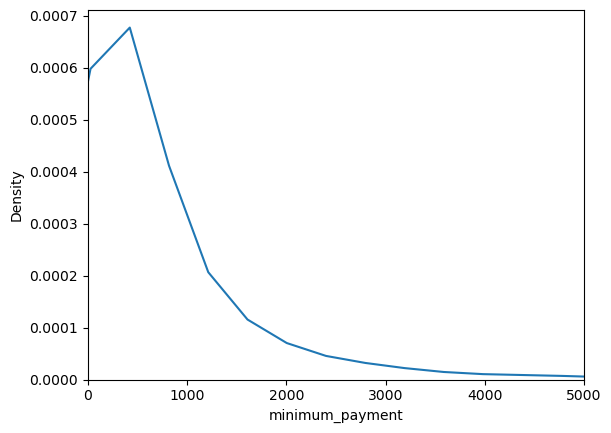

In [27]:
ax = sns.kdeplot(data=df, x="minimum_payment")
ax.set_xlim(0, 5000)

Judging from the density plot, it is right skewed. The mdedian is a better choice than the mean

In [28]:
df['minimum_payment'].fillna(df['minimum_payment'].median(), inplace = True)

In [29]:
df.isnull().sum()

balance                            0
balance_frequency                  0
purchase                           0
oneoff_purchase                    0
installment_purchase               0
cash_advance                       0
purchase_frequency                 0
oneoff_purchase_frequency          0
purchase_installment_frequency     0
cash_advance_frequency             0
cash_advance_transaction_number    0
purchase_transaction_number        0
credit_limit                       0
payment                            0
minimum_payment                    0
percent_full_payment               0
tenure                             0
dtype: int64

In [30]:
df

balance  balance_frequency  purchase  oneoff_purchase  \
0       40.900749           0.818182     95.40             0.00   
1     3202.467416           0.909091      0.00             0.00   
2     2495.148862           1.000000    773.17           773.17   
3     1666.670542           0.636364   1499.00          1499.00   
4      817.714335           1.000000     16.00            16.00   
...           ...                ...       ...              ...   
8945    28.493517           1.000000    291.12             0.00   
8946    19.183215           1.000000    300.00             0.00   
8947    23.398673           0.833333    144.40             0.00   
8948    13.457564           0.833333      0.00             0.00   
8949   372.708075           0.666667   1093.25          1093.25   

      installment_purchase  cash_advance  purchase_frequency  \
0                    95.40      0.000000            0.166667   
1                     0.00   6442.945483            0.000000   
2                     0.00      0.000000            1.000000   
3                     0.00    205.788017            0.083333   
4                     0.00      0.000000            0.083333   
...                    ...           ...                 ...   
8945                291.12      0.000000            1.000000   
8946                300.00      0.000000            1.000000   
8947                144.40      0.000000            0.833333   
8948                  0.00     36.558778            0.000000   
8949                  0.00    127.040008            0.666667   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                      0.000000                        0.083333   
1                      0.000000                        0.000000   
2                      1.000000                        0.000000   
3                      0.083333                        0.000000   
4                      0.083333                        0.000000   
...                         ...                             ...   
8945                   0.000000                        0.833333   
8946                   0.000000                        0.833333   
8947                   0.000000                        0.666667   
8948                   0.000000                        0.000000   
8949                   0.666667                        0.000000   

      cash_advance_frequency  cash_advance_transaction_number  \
0                   0.000000                                0   
1                   0.250000                                4   
2                   0.000000                                0   
3                   0.083333                                1   
4                   0.000000                                0   
...                      ...                              ...   
8945                0.000000                                0   
8946                0.000000                                0   
8947                0.000000                                0   
8948                0.166667                                2   
8949                0.333333                                2   

      purchase_transaction_number  credit_limit      payment  minimum_payment  \
0                               2        1000.0   201.802084       139.509787   
1                               0        7000.0  4103.032597      1072.340217   
2                              12        7500.0   622.066742       627.284787   
3                               1        7500.0     0.000000       312.452292   
4                               1        1200.0   678.334763       244.791237   
...                           ...           ...          ...              ...   
8945                            6        1000.0   325.594462        48.886365   
8946                            6        1000.0   275.861322       312.452292   
8947                            5        1000.0    81.270775        82.418369   
8948                            0       

### Outliers

#### use IQR

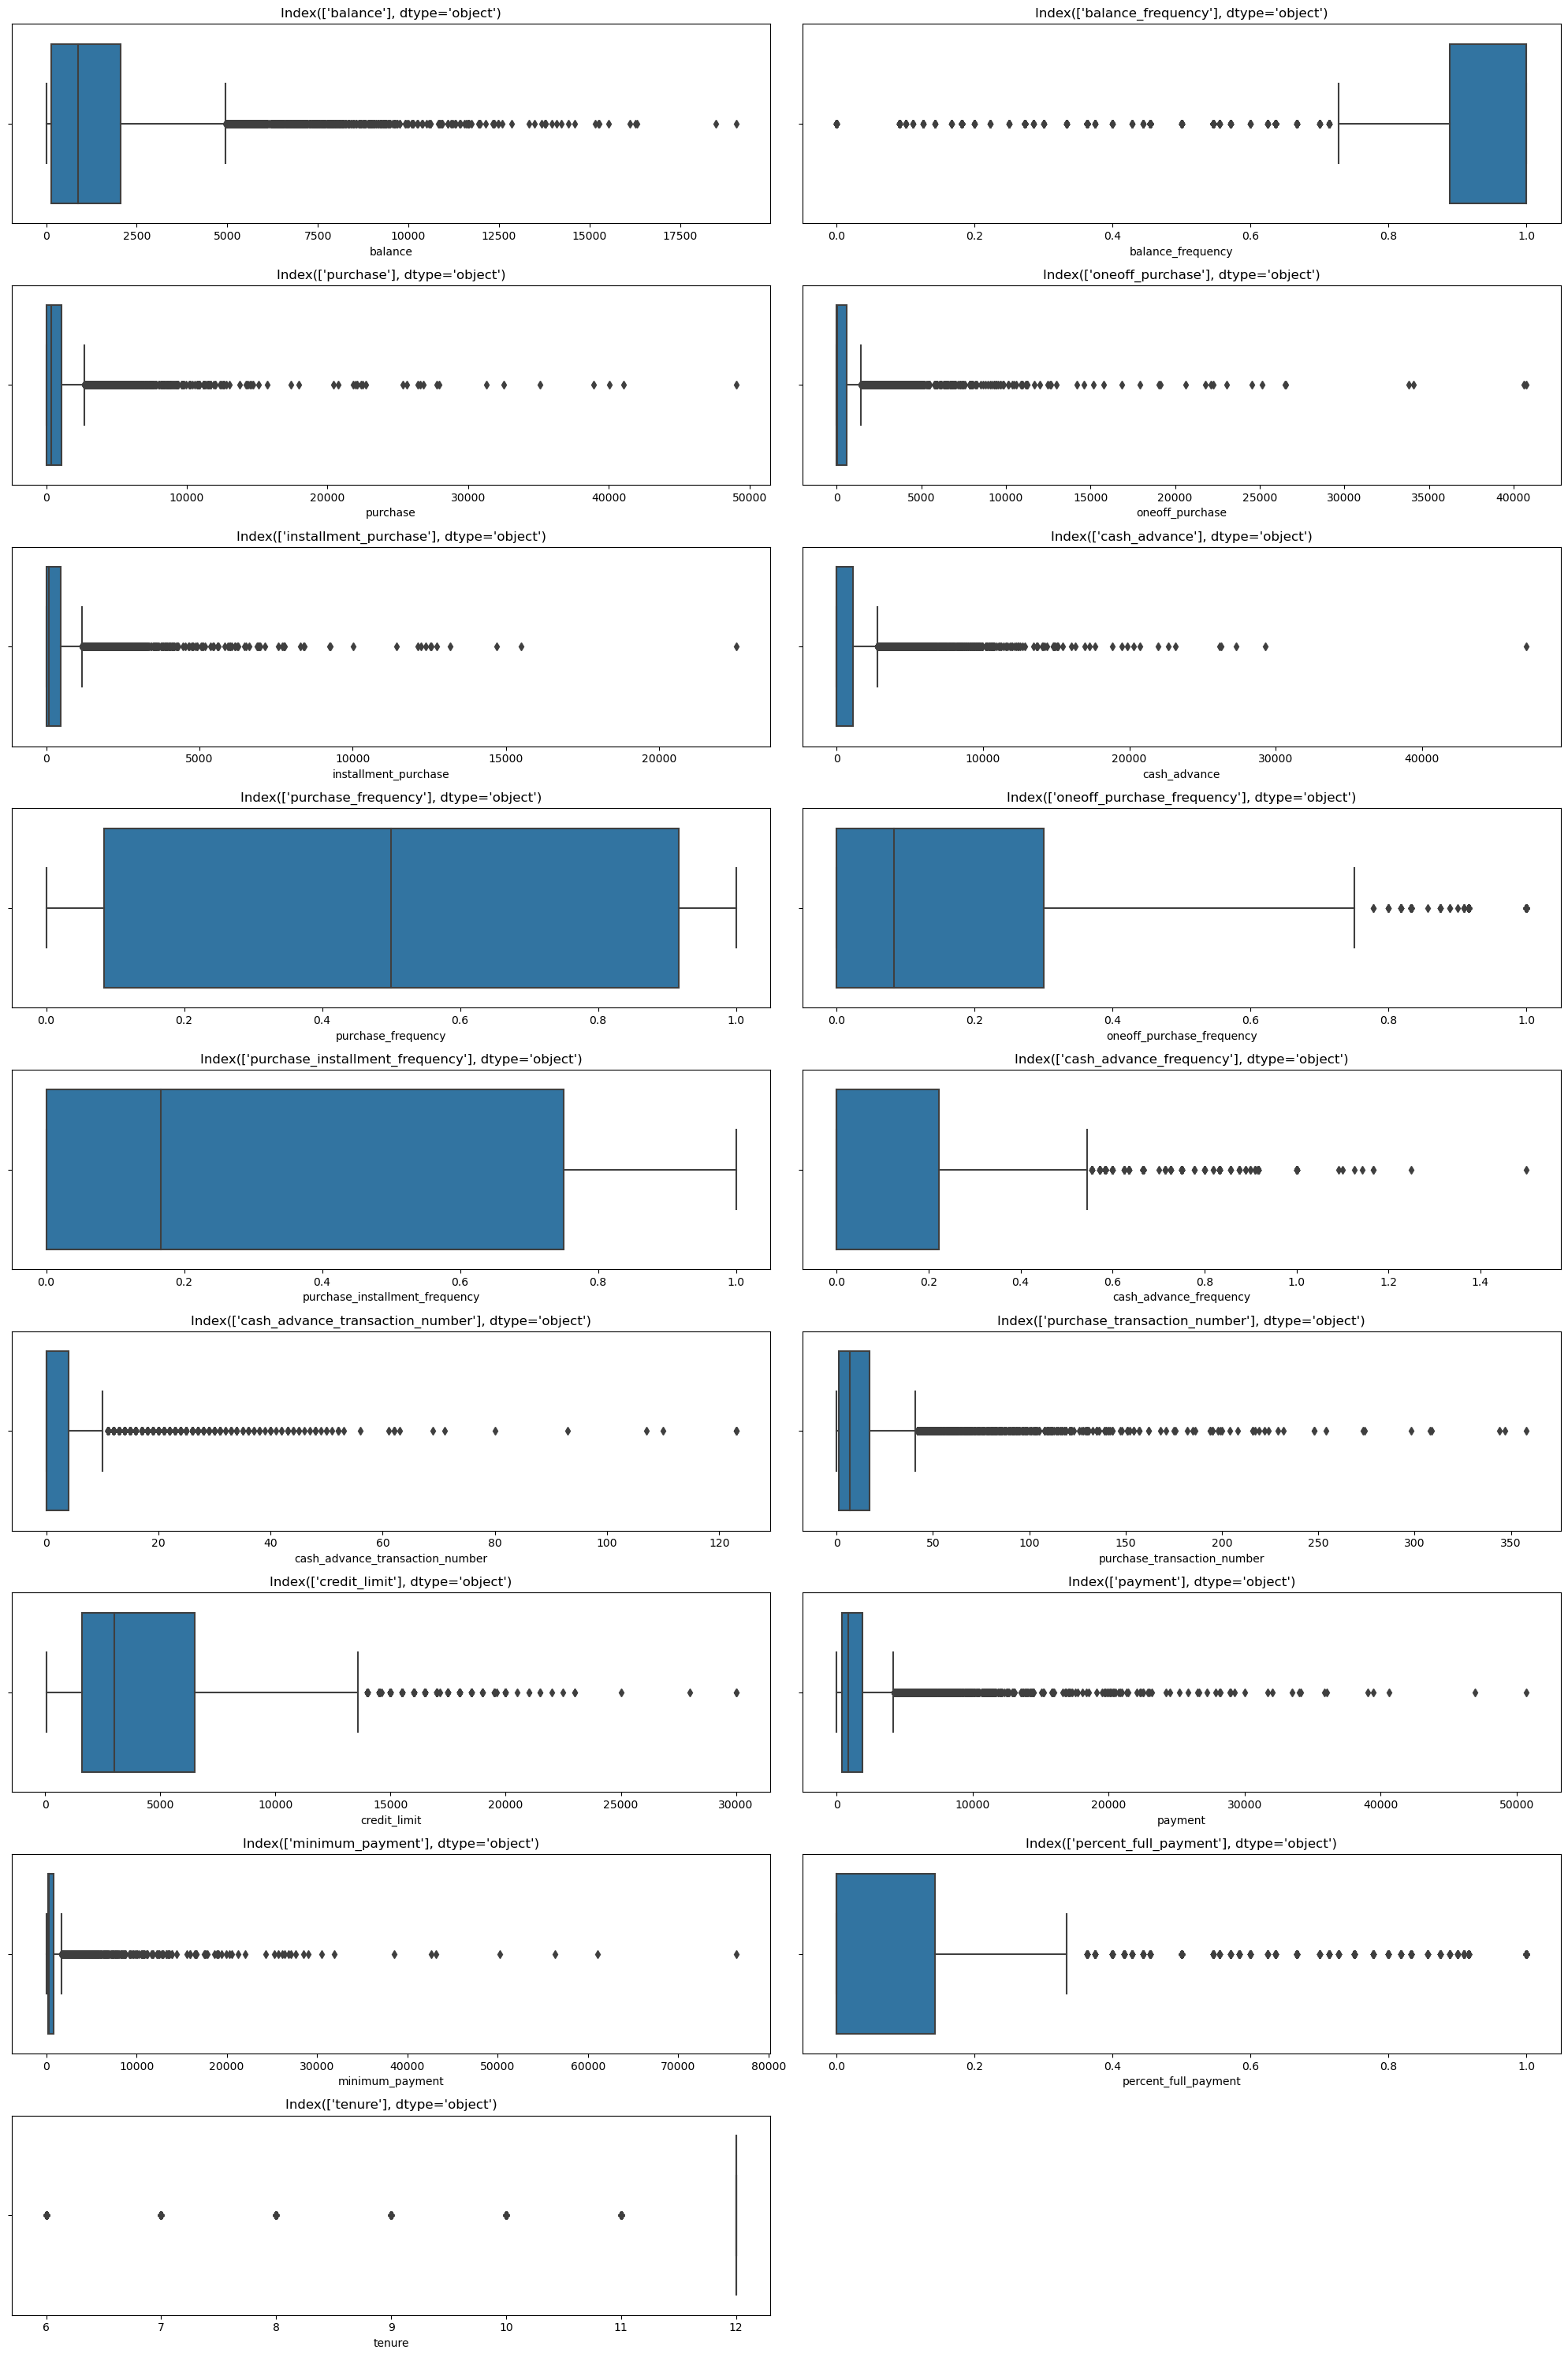

In [31]:
plt.figure(figsize=(20, 30))
for i in range(len(df.columns)):
    plt.subplot(9,2,i+1)
    sns.boxplot(x = df.columns[i], data=df)
    plt.title(df.columns[[i]])
plt.tight_layout()              

* It looks like there are too many outliers. Further check the percent of outliers

In [32]:
# check the percent of outliers in every column
def outlier_percent(data):
    outliers_data = []
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    minimum = Q1 - (1.5 * IQR)
    maximum = Q3 + (1.5 * IQR)
    num_outliers =  np.sum((data < minimum) |(data > maximum))
    num_total = data.count()
    percent = (num_outliers/num_total)*100
    outliers_data.append(percent)
    return outliers_data

In [33]:
outlier_percent(df)

[balance                             7.766231
 balance_frequency                  16.672254
 purchase                            9.028942
 oneoff_purchase                    11.319701
 installment_purchase                9.688233
 cash_advance                       11.509666
 purchase_frequency                  0.000000
 oneoff_purchase_frequency           8.738407
 purchase_installment_frequency      0.000000
 cash_advance_frequency              5.866577
 cash_advance_transaction_number     8.984244
 purchase_transaction_number         8.559616
 credit_limit                        2.771259
 payment                             9.028942
 minimum_payment                    10.157560
 percent_full_payment               16.471114
 tenure                             15.253101
 dtype: float64]

Okay, too many outliers, can't drop them all.
Let's futher check the statistics data and distribution

### use z-score

In [34]:
def Zscore_outlier(data):
    outliers_data = []
    m = np.mean(data)
    sd = np.std(data)
    num_outliers = np.sum(np.abs((data-m)/sd) > 3)
    num_total = data.count()
    percent = (num_outliers/num_total) * 100
    outliers_data.append(percent)
    return outliers_data

In [35]:
Zscore_outlier(df)

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


[balance                            2.190189
 balance_frequency                  2.033747
 purchase                           1.508548
 oneoff_purchase                    1.363281
 installment_purchase               1.530897
 cash_advance                       2.033747
 purchase_frequency                 0.000000
 oneoff_purchase_frequency          0.000000
 purchase_installment_frequency     0.000000
 cash_advance_frequency             2.223712
 cash_advance_transaction_number    1.922002
 purchase_transaction_number        2.067270
 credit_limit                       1.698514
 payment                            1.776735
 minimum_payment                    1.139792
 percent_full_payment               0.000000
 tenure                             4.391552
 dtype: float64]

* They ought to be dropped from the dataset, but let's first further check the distribution

### Distribution

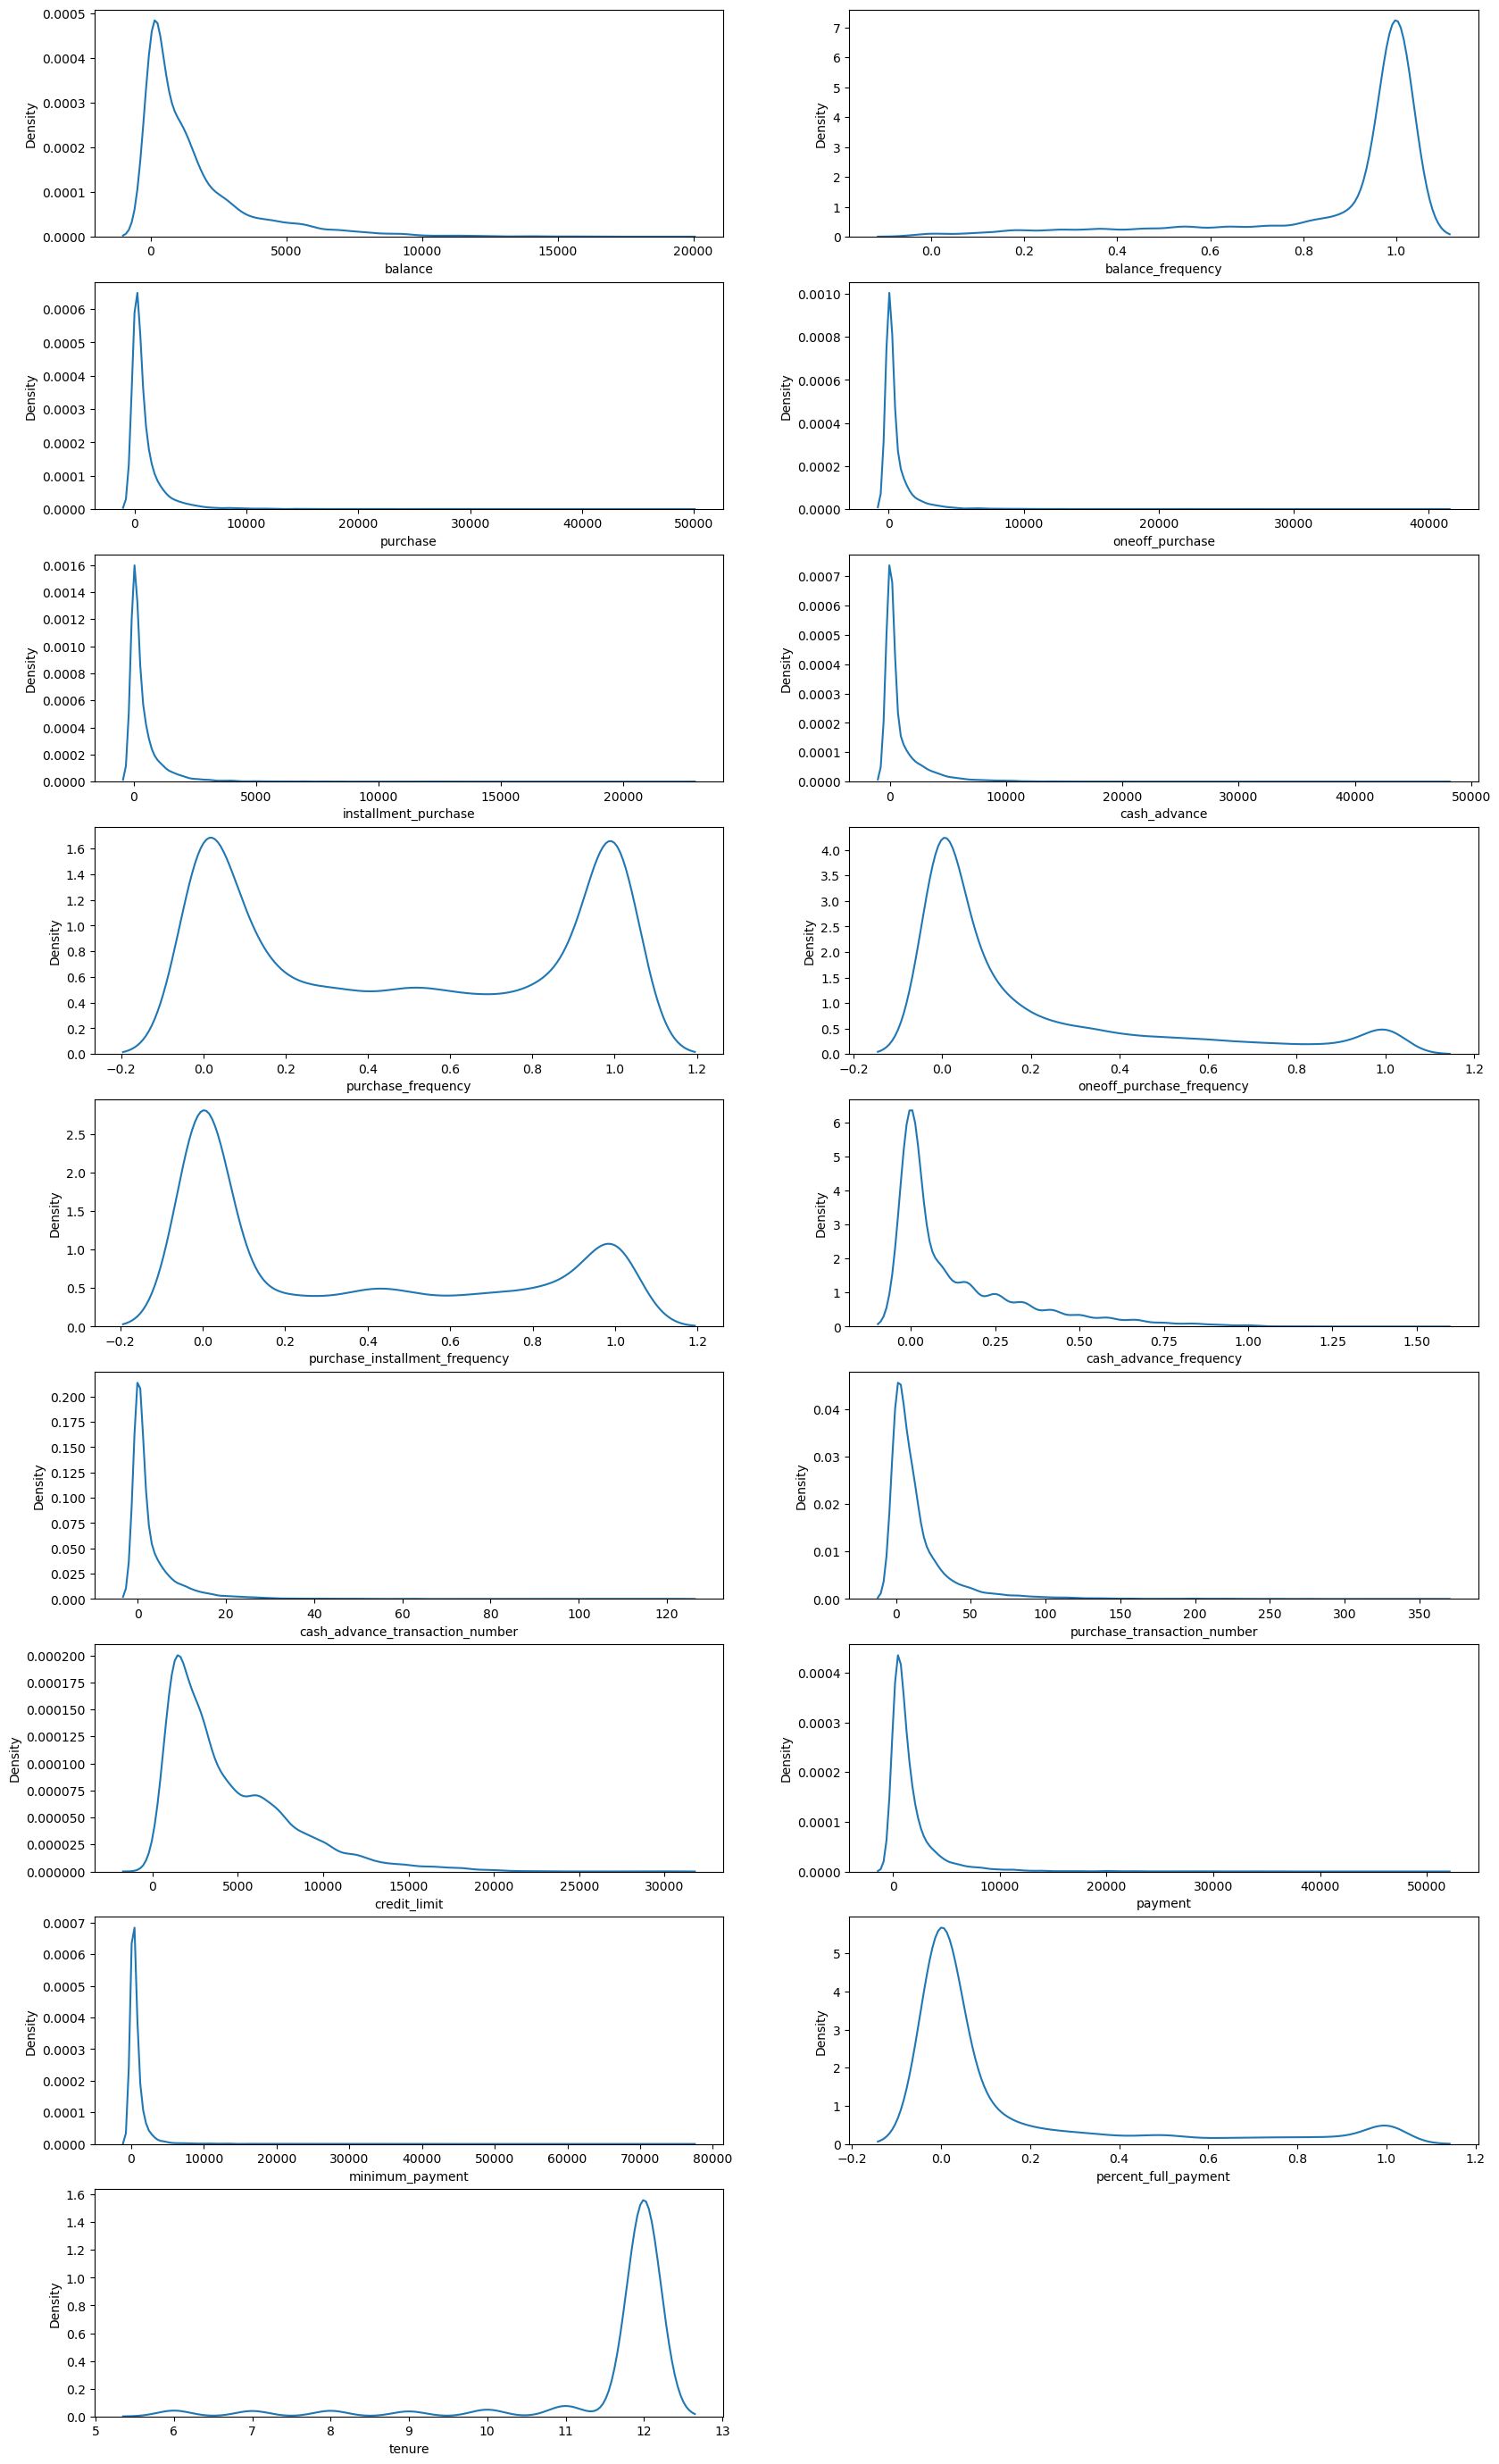

In [36]:
plt.figure(figsize=(20, 35))
for i, col in enumerate(df.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(df[col], ax = ax)

* They are skewed. But in reality, it is expected that few people that are really rich will twisted the distribution of money spent. The outliers and skewed distribution reflected the wealth distribution in reality.
* Besides, the aim of the paper is to cluster and group customers, where very wealthy customers are a part of the total customers. Their characteristics require to be researched too.
* Considering these two factors, the outliers and the distribution are not gonna be dealt the with.

### Standardization

* I don't want to change the distribution much. I want to limit the information loss in the mormalization process to minimum. 
* Therefore, compared to standardscaler, minmaxscaler is a better choice since it only changes the range

In [37]:
x = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)
x

balance  balance_frequency  purchase  oneoff_purchase  \
0    -0.732054          -0.249881 -0.424934        -0.356957   
1     0.786858           0.134049 -0.469584        -0.356957   
2     0.447041           0.517980 -0.107716         0.108843   
3     0.049015          -1.017743  0.231995         0.546123   
4    -0.358849           0.517980 -0.462095        -0.347317   
...        ...                ...       ...              ...   
8944 -0.738015           0.517980 -0.333331        -0.356957   
8945 -0.742488           0.517980 -0.329174        -0.356957   
8946 -0.740463          -0.185895 -0.402000        -0.356957   
8947 -0.745239          -0.185895 -0.469584        -0.356957   
8948 -0.572644          -0.889766  0.042092         0.301677   

      installment_purchase  cash_advance  purchase_frequency  \
0                -0.349114     -0.466805           -0.806649   
1                -0.454607      2.605438           -1.221928   
2                -0.454607     -0.466805            1.269742   
3                -0.454607     -0.368678           -1.014290   
4                -0.454607     -0.466805           -1.014290   
...                    ...           ...                 ...   
8944             -0.132688     -0.466805            1.269742   
8945             -0.122869     -0.466805            1.269742   
8946             -0.294930     -0.466805            0.854463   
8947             -0.454607     -0.449373           -1.221928   
8948             -0.454607     -0.406228            0.439186   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                     -0.678716                       -0.707409   
1                     -0.678716                       -0.917090   
2                      2.673295                       -0.917090   
3                     -0.399383                       -0.917090   
4                     -0.399383                       -0.917090   
...                         ...                             ...   
8944                  -0.678716                        1.179720   
8945                  -0.678716                        1.179720   
8946                  -0.678716                        0.760359   
8947                  -0.678716                       -0.917090   
8948                   1.555959                       -0.917090   

      cash_advance_frequency  cash_advance_transaction_number  \
0                  -0.675294                        -0.476083   
1                   0.573949                         0.110032   
2                  -0.675294                        -0.476083   
3                  -0.258882                        -0.329554   
4                  -0.675294                        -0.476083   
...                      ...                              ...   
8944               -0.675294                        -0.476083   
8945               -0.675294                        -0.476083   
8946               -0.675294                        -0.476083   
8947                0.157536                        -0.183026   
8948                0.990362                        -0.183026   

      purchase_transaction_number  credit_limit   payment  minimum_payment  \
0                       -0.511381     -0.960380 -0.529026        -0.302427   
1                       -0.591841      0.688601  0.818546         0.097453   
2                       -0.109082      0.826016 -0.383857        -0.093330   
3                       -0.551611      0.826016 -0.598733        -0.228291   
4                       -0.551611     -0.905414 -0.364421        -0.257295   
...                           ...           ...       ...              ...   
8944                    -0.350461     -0.960380 -0.486266        -0.341275   
8945                    -0.350461     -0.960380 -0.503445        -0.228291   
8946                    -0.390691     -0.960380 -0.570660        -0.326900   
8947                    -0.591841     -1.097795 -0.580581        -0.338330   
8948                     

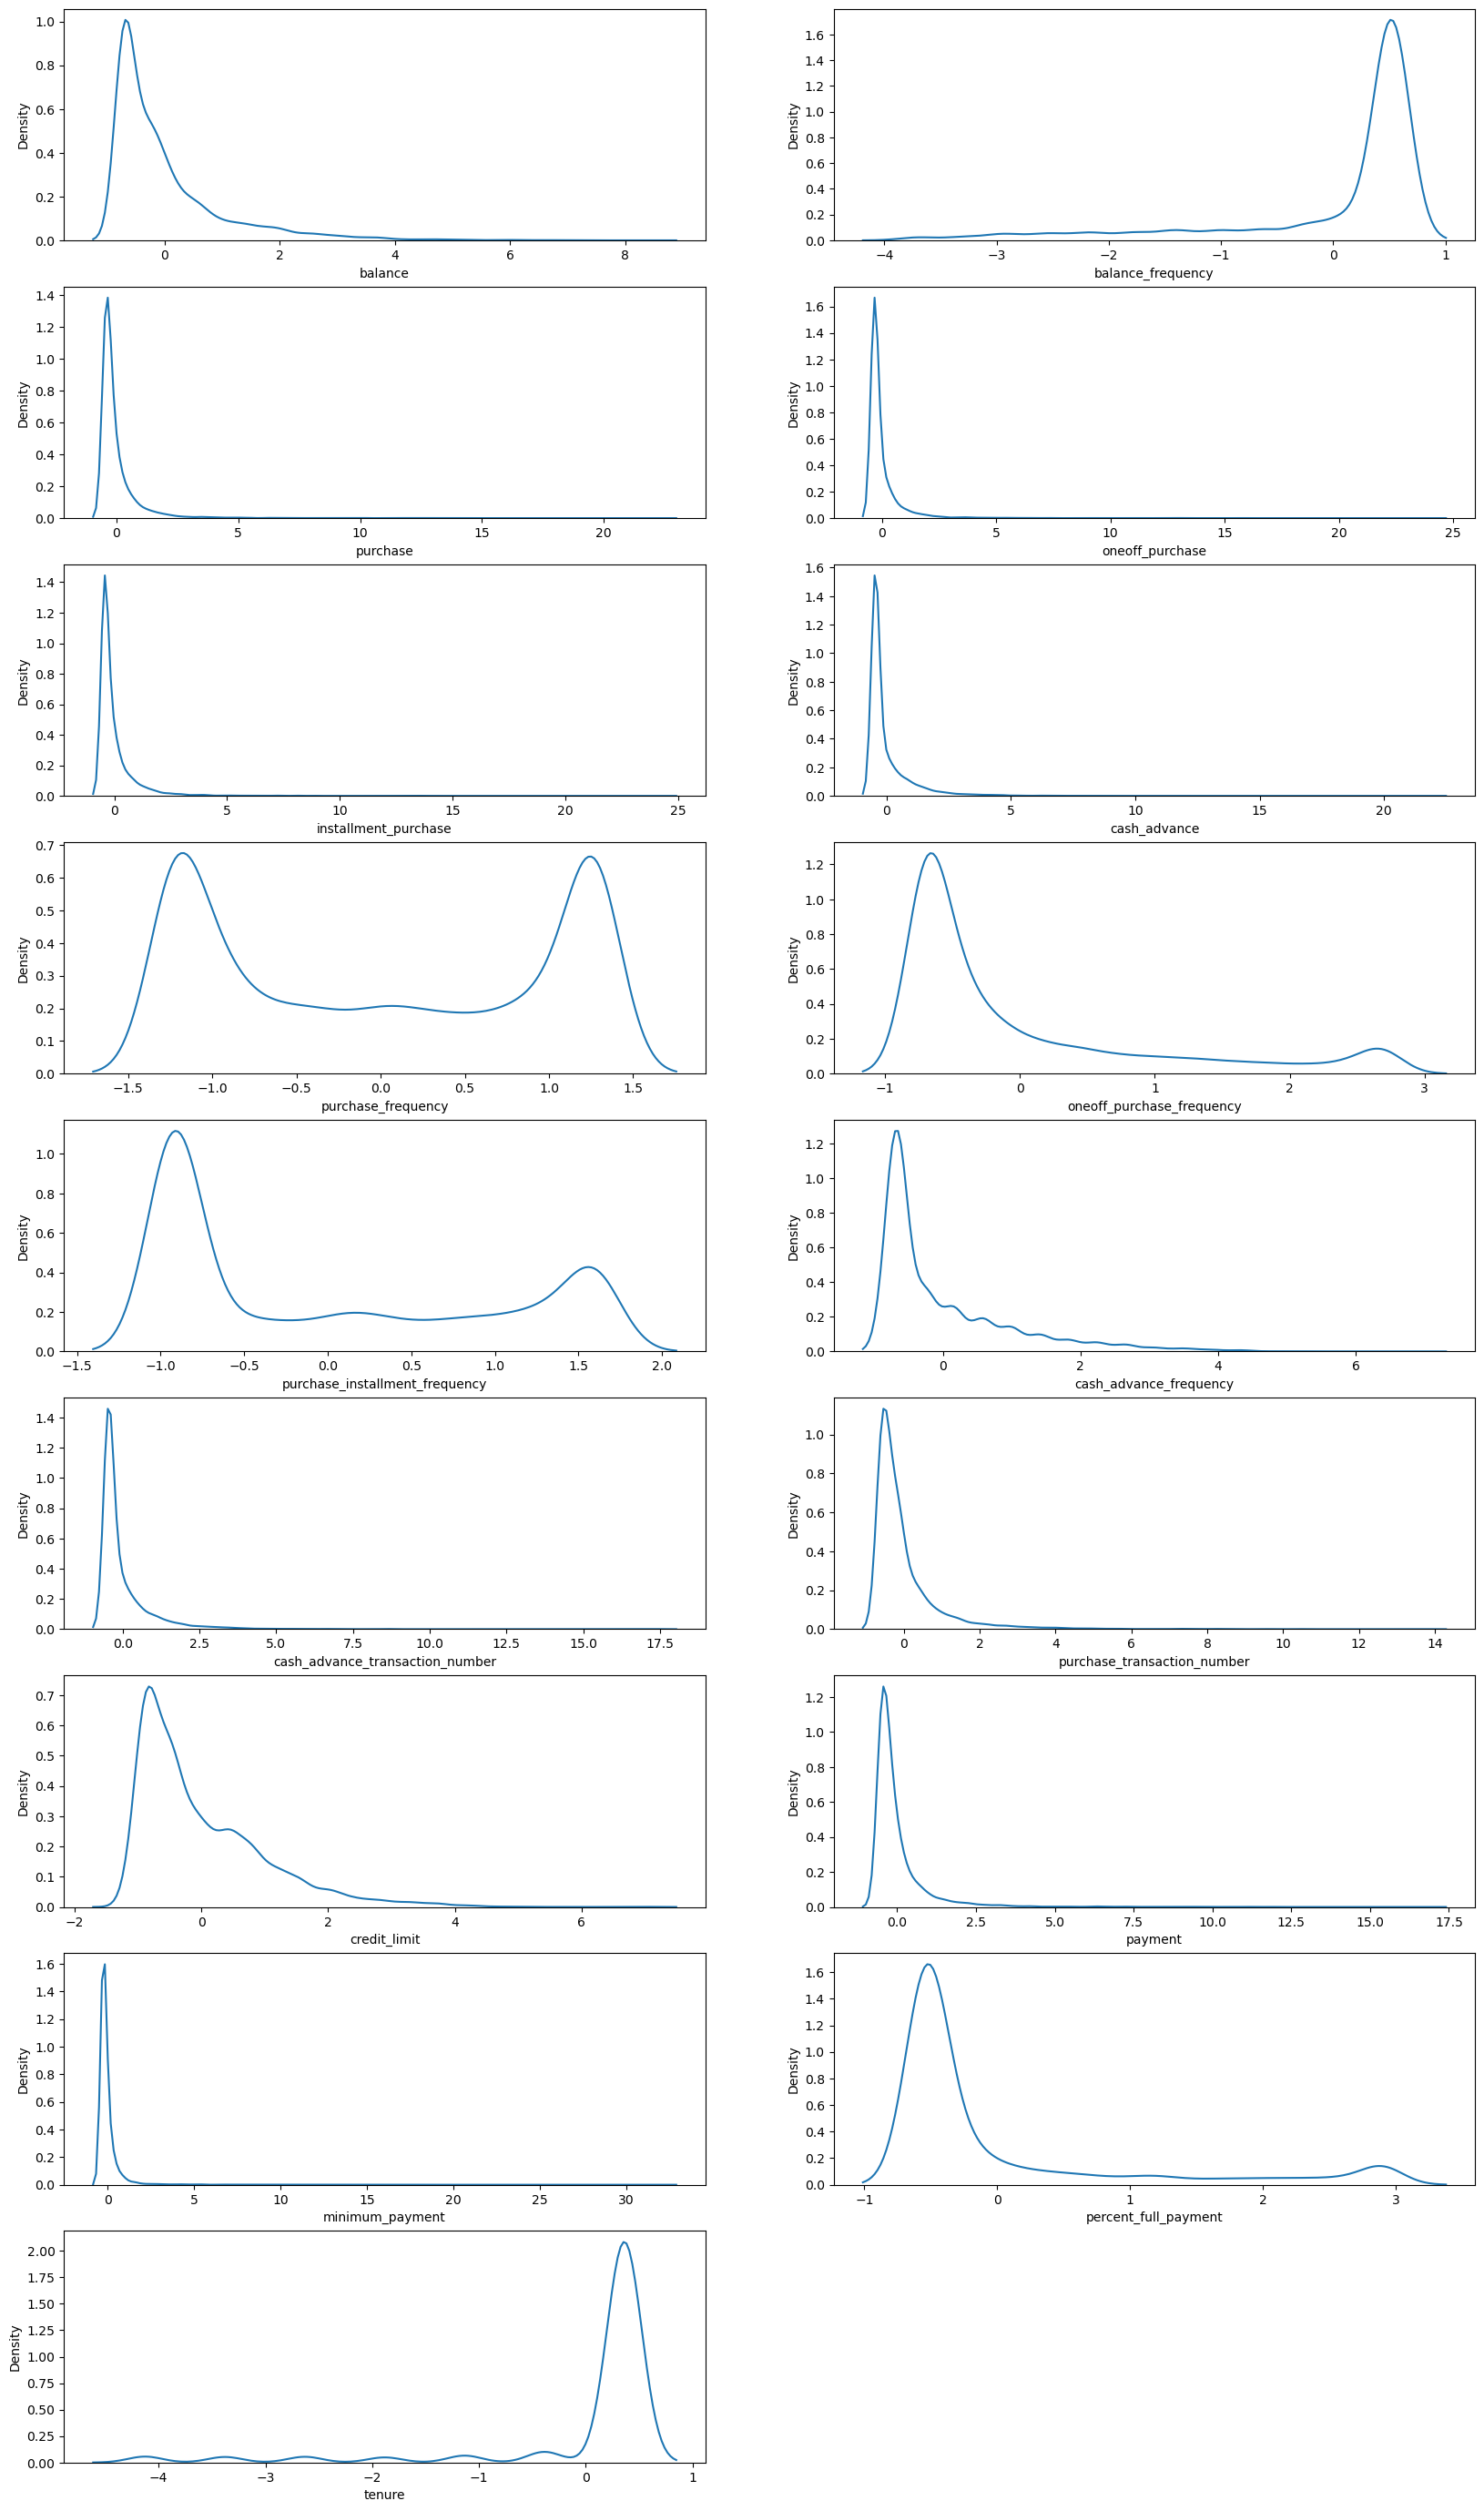

In [38]:
plt.figure(figsize=(20, 35))
for i, col in enumerate(x.columns):
    ax = plt.subplot(9, 2, i+1)
    sns.kdeplot(x[col], ax = ax)

#### Conclusion about preprocessing data

* The aim of the process is to find clusters and interpret clusters to extract information from the different groups. 
* Because the outliers and skewed distribution in the credit card dataset kinds of reflect the reality of wealth distribution (very few people pocess lot of money), they will not be dealt with.
* Since the range of attributes affect the model like pca which computes distance, its range is dealt with normalization.

## Exploratory data analysis

<AxesSubplot: >

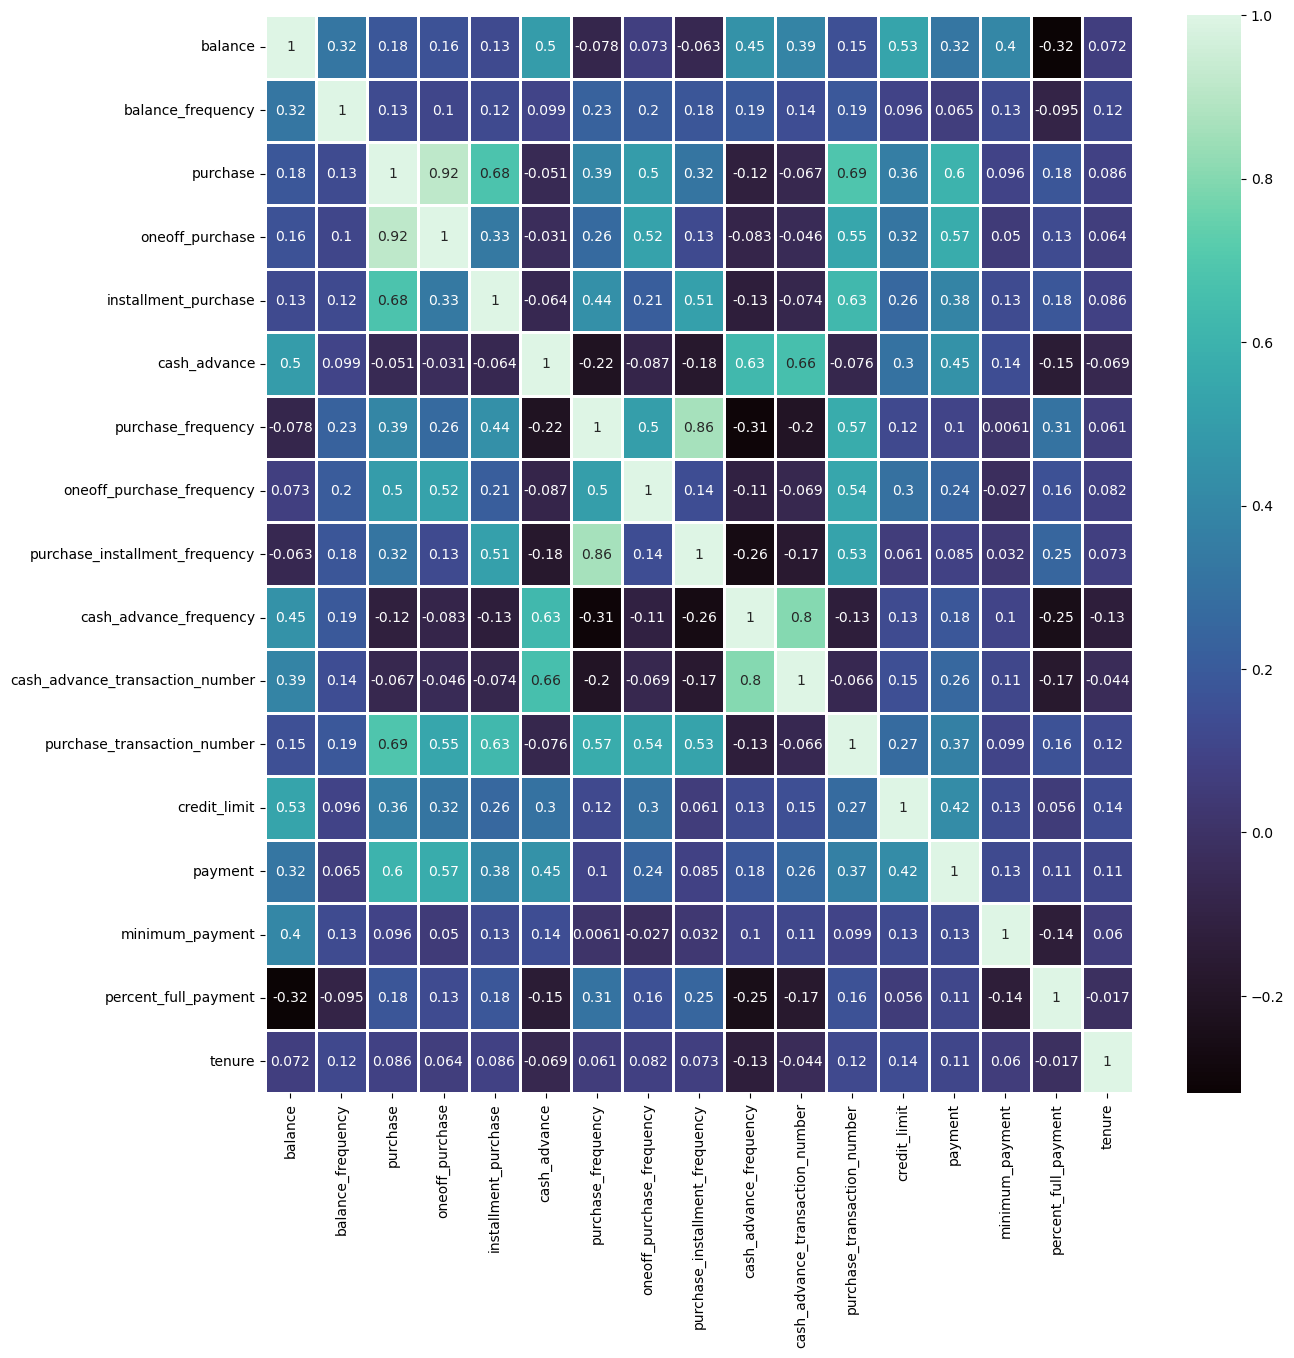

In [39]:
plt.figure(figsize=(14, 14))
sns.heatmap(data = df.corr(), annot = True,  cmap = "mako", linewidth=2)

* Some of the columns are highly correlated (correlation coefficients between 0.8 ~ 1.0)
* But it is not a problem for clustering, and it indicated that there would be some connected columns which benefit us to better group card users.

#### Split the columns into four parts

In [40]:
df.columns

Index(['balance', 'balance_frequency', 'purchase', 'oneoff_purchase',
       'installment_purchase', 'cash_advance', 'purchase_frequency',
       'oneoff_purchase_frequency', 'purchase_installment_frequency',
       'cash_advance_frequency', 'cash_advance_transaction_number',
       'purchase_transaction_number', 'credit_limit', 'payment',
       'minimum_payment', 'percent_full_payment', 'tenure'],
      dtype='object')

* Areas: 
    * general condition: 'balance', 'balance_frequency', 'credit_limit', 'tenure',
    * purchase type: 'purchase', 'oneoff_purchase', 'installments_purchase', 'cash_advance'
    * purchase frequency:  'purchase_frequency', 'oneoff_purchase_frequency', 'purchase_installment_frequency', 'cash_advance_frequency', 'cash_advance_transaction_number', 'purchase_transaction_number', 
    * payment: 'payment', 'minimum_payment', 'percent_full_payment'
* Considering the business need of banks, tenure and credit limit are variables that controled by the bank. Therefore, they are attributes linked with strategy making and they will added into each group.

In [41]:
df_gc = df[['balance', 'balance_frequency', 'credit_limit', 'tenure']]
df_pt = df[['purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance', 'credit_limit', 'tenure']]
df_pf = df[['purchase_frequency', 'oneoff_purchase_frequency', 'purchase_installment_frequency', 
            'cash_advance_frequency', 'cash_advance_transaction_number', 'purchase_transaction_number', 'credit_limit', 'tenure']]
df_p = df[['payment', 'minimum_payment', 'percent_full_payment','credit_limit', 'tenure']]


### Genral condition

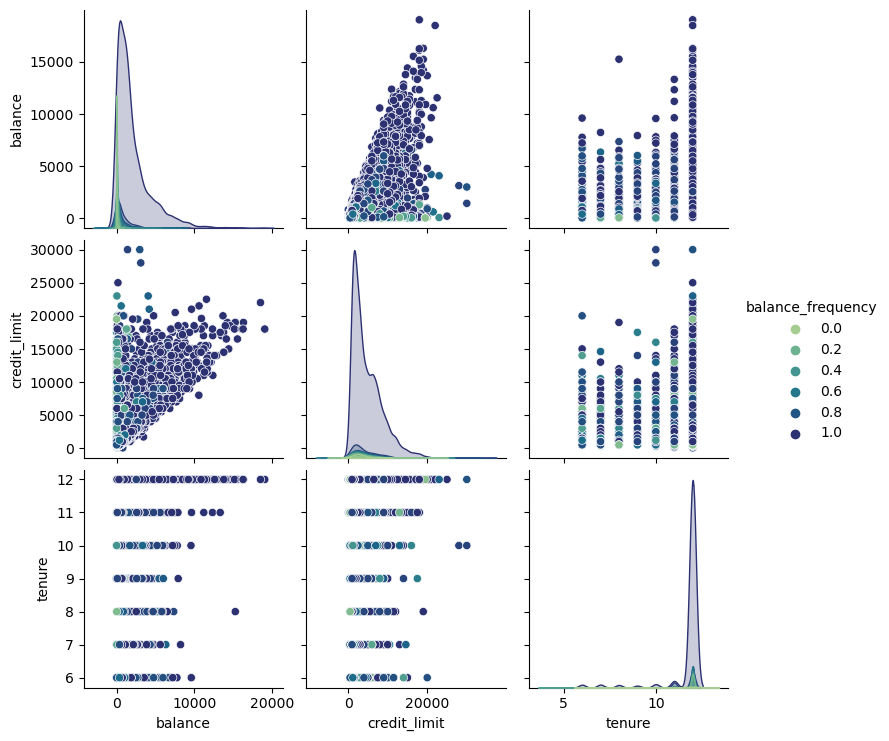

In [42]:
sns.pairplot(data=df_gc, palette="crest", hue="balance_frequency")

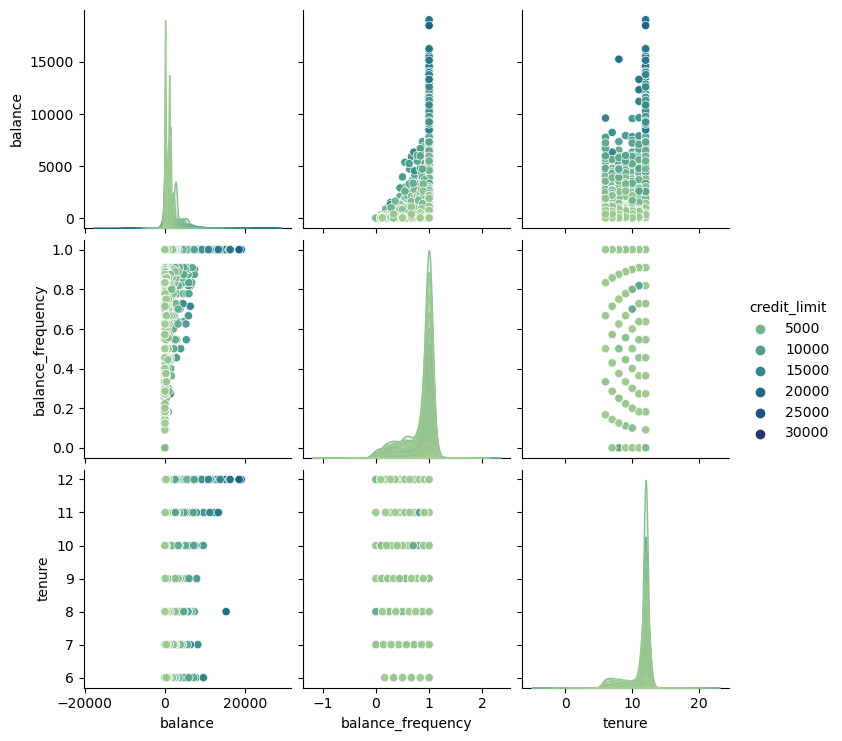

In [43]:
sns.pairplot(data=df_gc, palette="crest", hue="credit_limit")

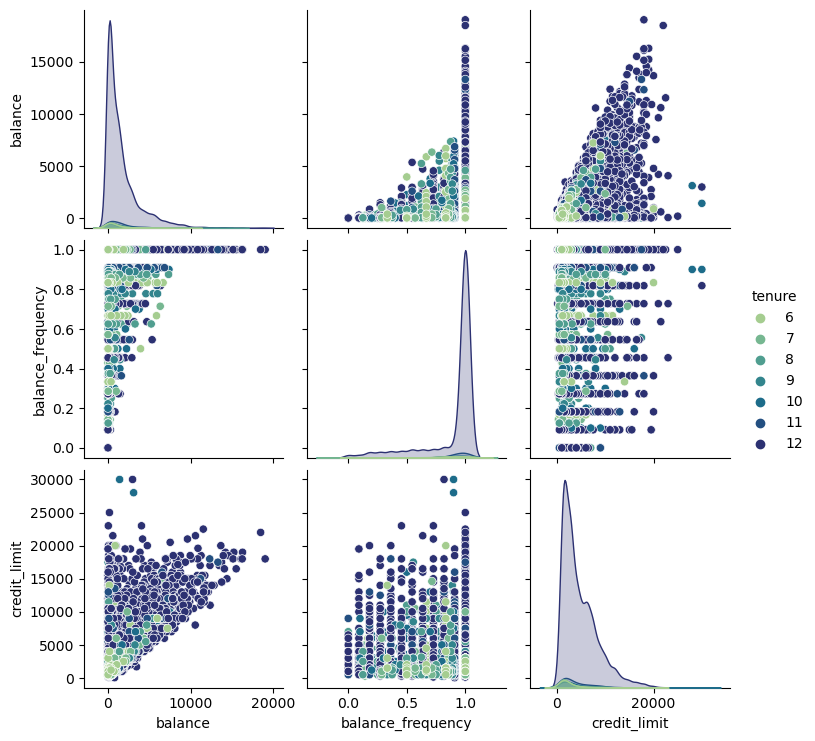

In [44]:
sns.pairplot(data=df_gc, palette="crest", hue="tenure")

<AxesSubplot: >

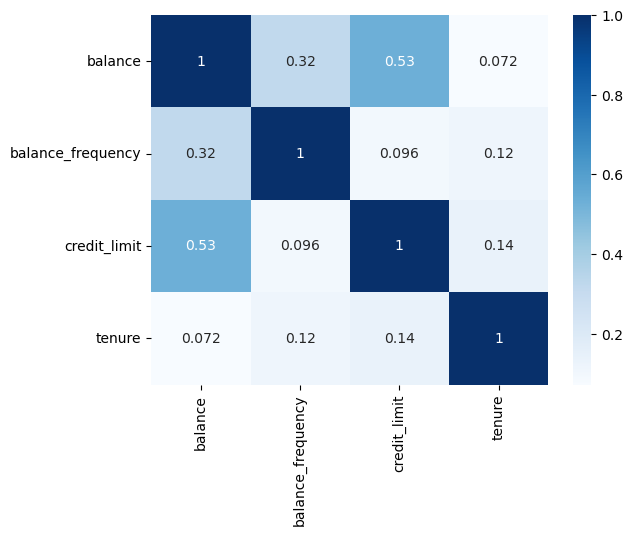

In [45]:
sns.heatmap(data=df_gc.corr(), cmap="Blues", annot=True)

<AxesSubplot: xlabel='balance', ylabel='credit_limit'>

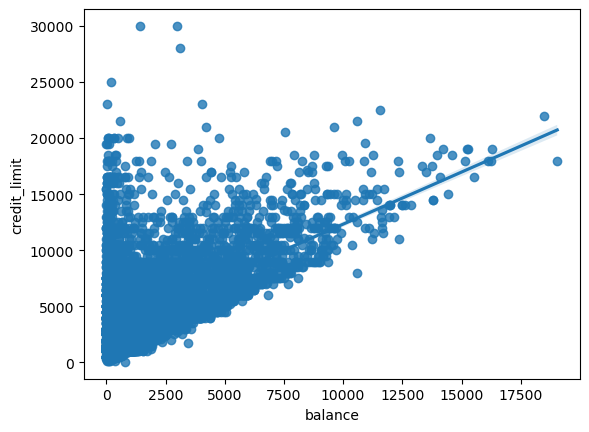

In [46]:
sns.regplot(x="balance", y="credit_limit", data=df_gc)

* Balance and credit limit are positively correlated.
* Balance and balance frequency are also highly correlated.
* From pairplot, longer tenure are correlated with both higher balance and higher balance frequency
#### Conclusion: 
* Users with higher balance amount left in the account tend to have a better money management habit and they are also more stable customers with longer tenure.

### Purchase type

In [47]:
df_pt.columns

Index(['purchase', 'oneoff_purchase', 'installment_purchase', 'cash_advance',
       'credit_limit', 'tenure'],
      dtype='object')

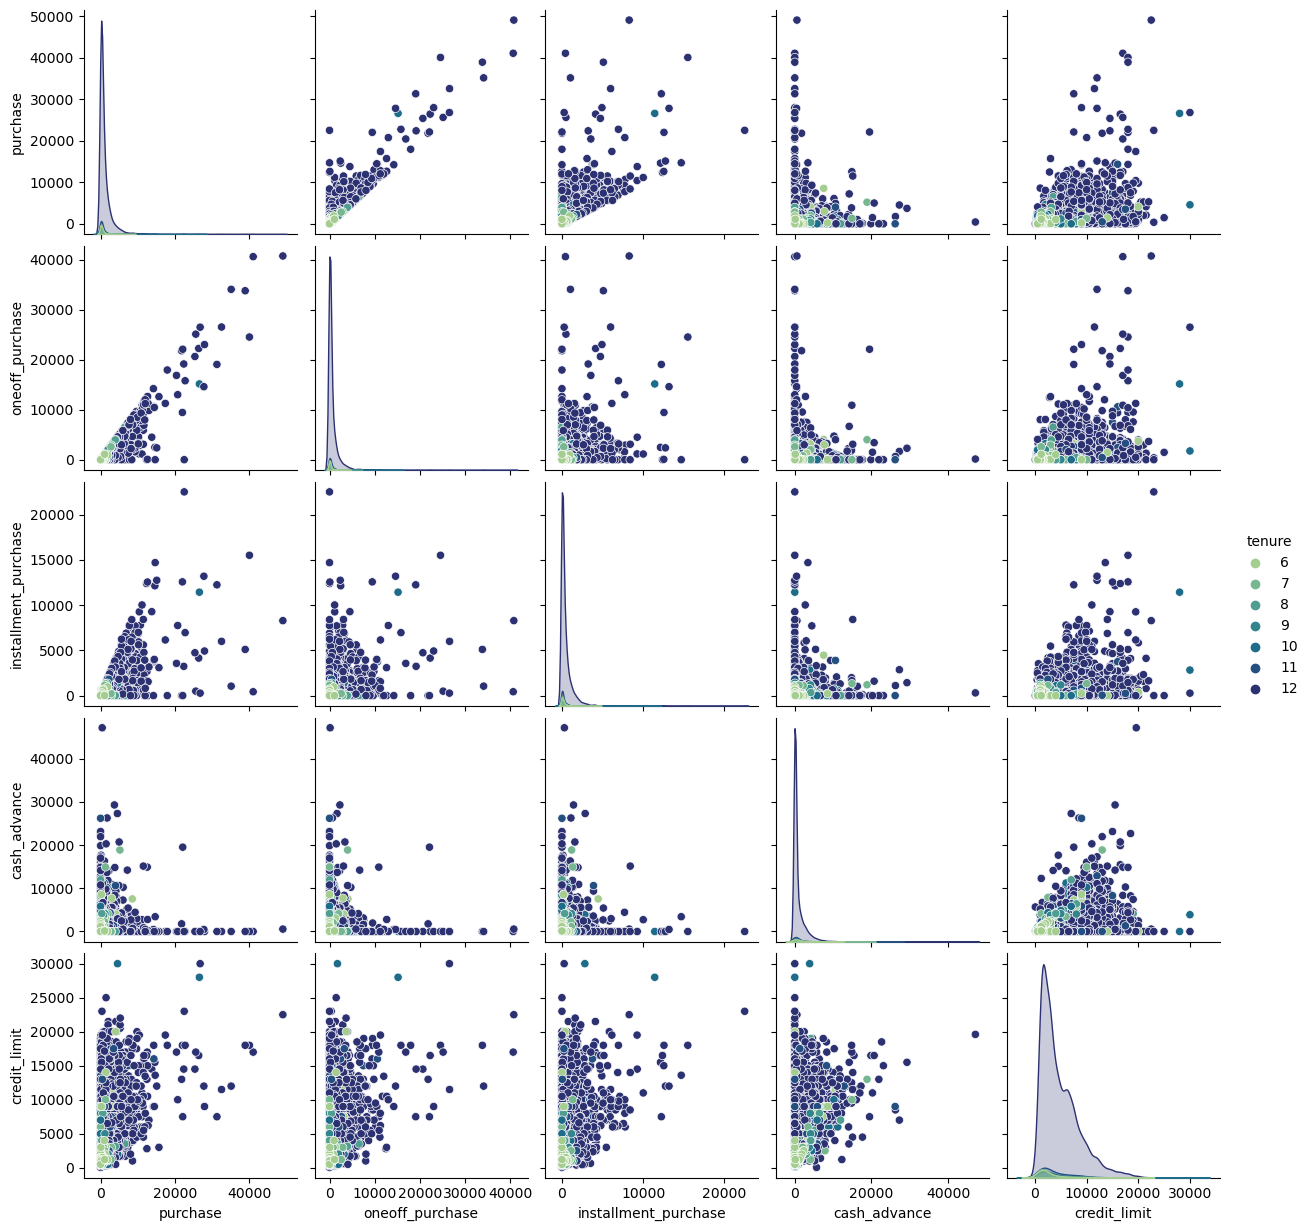

In [48]:
sns.pairplot(data = df_pt, hue="tenure", palette="crest")

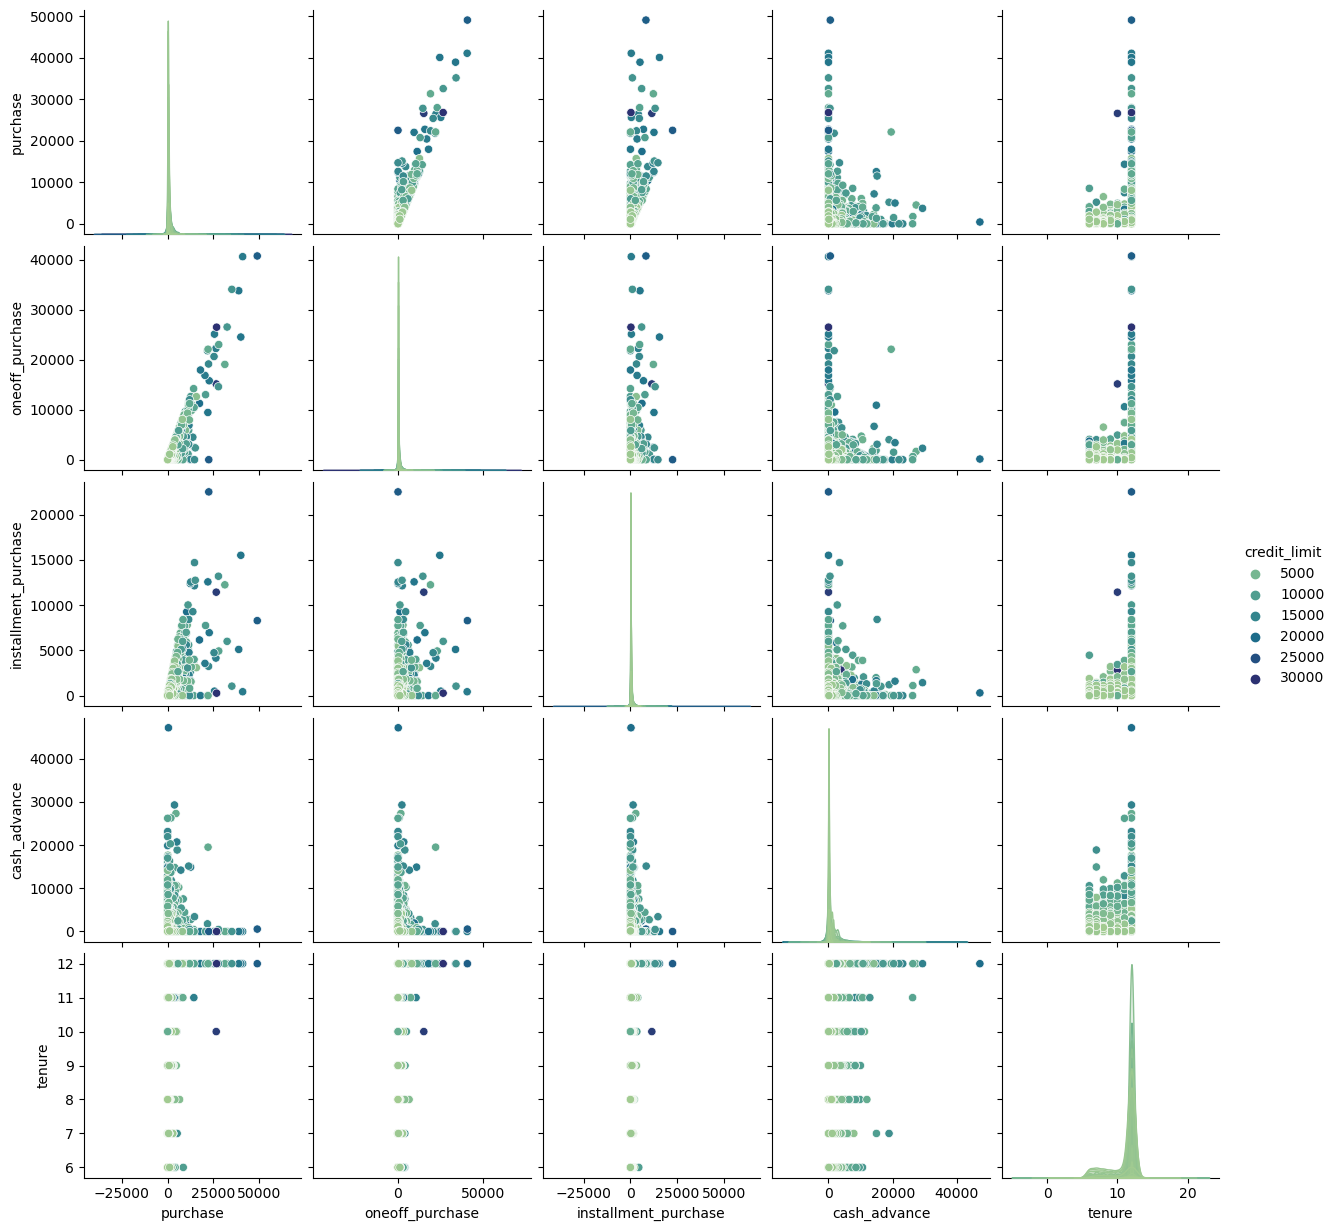

In [49]:
sns.pairplot(data = df_pt, hue="credit_limit", palette="crest")

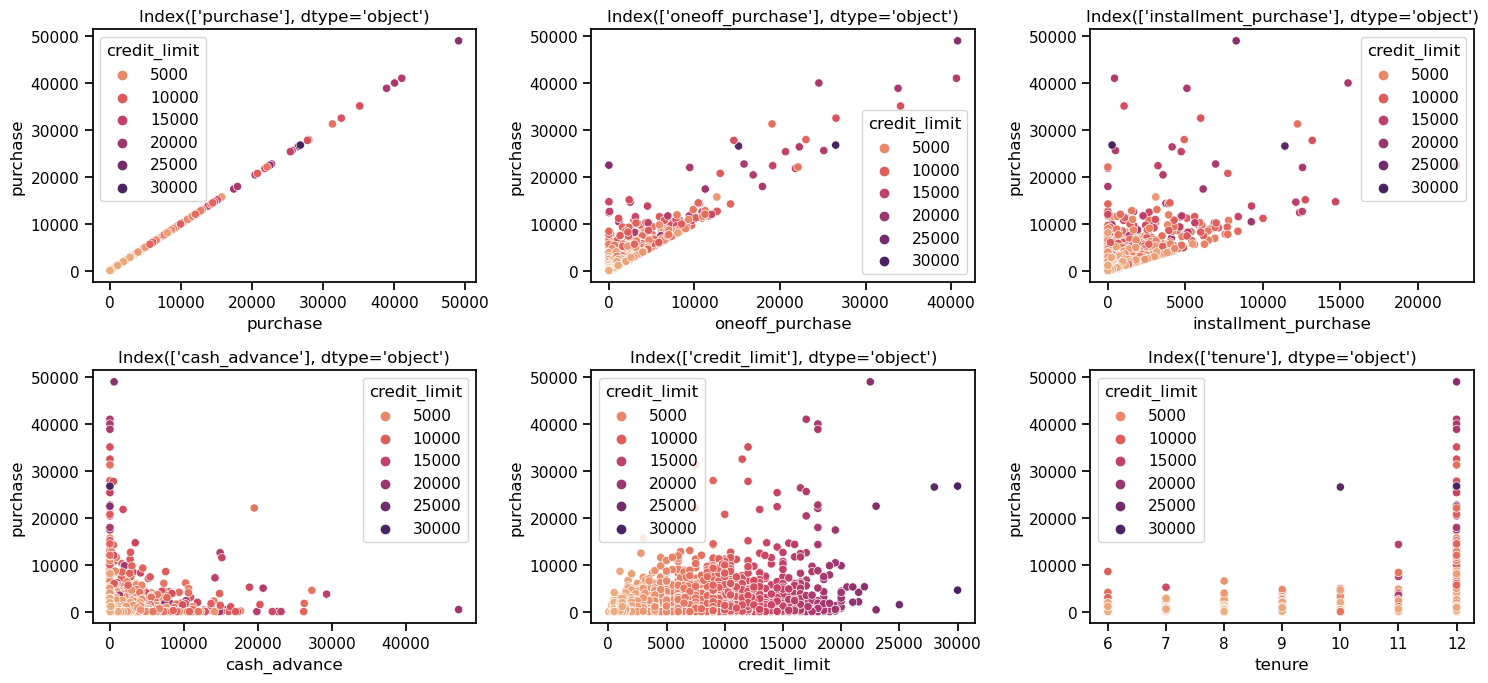

In [50]:
sns.set_context('notebook')
plt.figure(figsize=(15, 7))
for i in range(len(df_pt.columns)):
    plt.subplot(2,3,i+1)
    sns.scatterplot(x = df_pt.columns[i], y="purchase", data=df_pt, hue="credit_limit", palette="flare")
    plt.title(df_pt.columns[[i]])
plt.tight_layout()      

* purchase type:
    * oneoff purchase, installment purchase are positive related.
    * cash advance is negative related. It may indicate another kind of customer.
* credit limit:
    * higher credit limit customers tend to use more one-off purchase and installment purchase
* tenure:
    * tenure is not clearly linked with various purchase behaviours.

<AxesSubplot: >

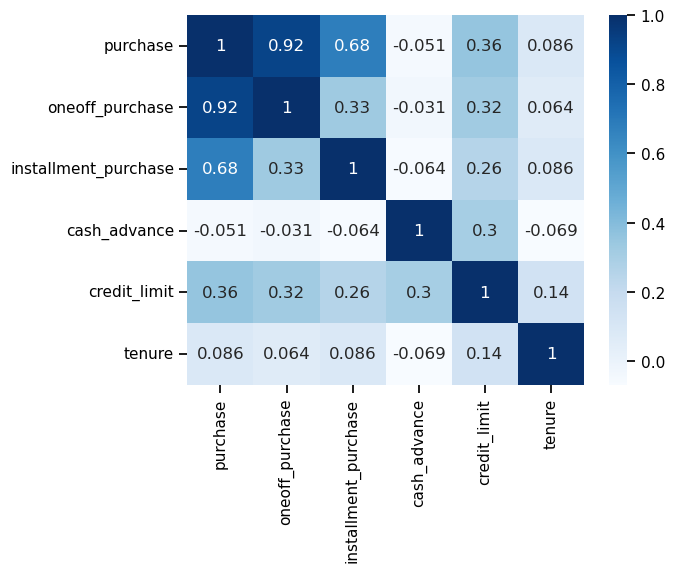

In [51]:
sns.heatmap(data = df_pt.corr(), cmap="Blues", annot=True)

#### Conslusion:
* In purchase area: 
    * Total puchase is correlated with oneoff_purchase, installment_purchase, indicating that credit customers tend to purchase stuff in one time or use installments provided by the credit card.
* As for credit limit and tenure:
    * Credit limit is linked with the total purchase. High credit limit customers tend to purchase more. More interesting, they use cash advance service more.
    * Tenure don't have apparent links with these attributes.

### Purchase frequency

In [52]:
df_pf

purchase_frequency  oneoff_purchase_frequency  \
0               0.166667                   0.000000   
1               0.000000                   0.000000   
2               1.000000                   1.000000   
3               0.083333                   0.083333   
4               0.083333                   0.083333   
...                  ...                        ...   
8945            1.000000                   0.000000   
8946            1.000000                   0.000000   
8947            0.833333                   0.000000   
8948            0.000000                   0.000000   
8949            0.666667                   0.666667   

      purchase_installment_frequency  cash_advance_frequency  \
0                           0.083333                0.000000   
1                           0.000000                0.250000   
2                           0.000000                0.000000   
3                           0.000000                0.083333   
4                           0.000000                0.000000   
...                              ...                     ...   
8945                        0.833333                0.000000   
8946                        0.833333                0.000000   
8947                        0.666667                0.000000   
8948                        0.000000                0.166667   
8949                        0.000000                0.333333   

      cash_advance_transaction_number  purchase_transaction_number  \
0                                   0                            2   
1                                   4                            0   
2                                   0                           12   
3                                   1                            1   
4                                   0                            1   
...                               ...                          ...   
8945                                0                            6   
8946                                0                            6   
8947                                0                            5   
8948                                2                            0   
8949                                2                           23   

      credit_limit  tenure  
0           1000.0      12  
1           7000.0      12  
2           7500.0      12  
3           7500.0      12  
4           1200.0      12  
...            ...     ...  
8945        1000.0       6  
8946        1000.0       6  
8947        1000.0       6  
8948         500.0       6  
8949        1200.0       6  

[8949 rows x 8 columns]

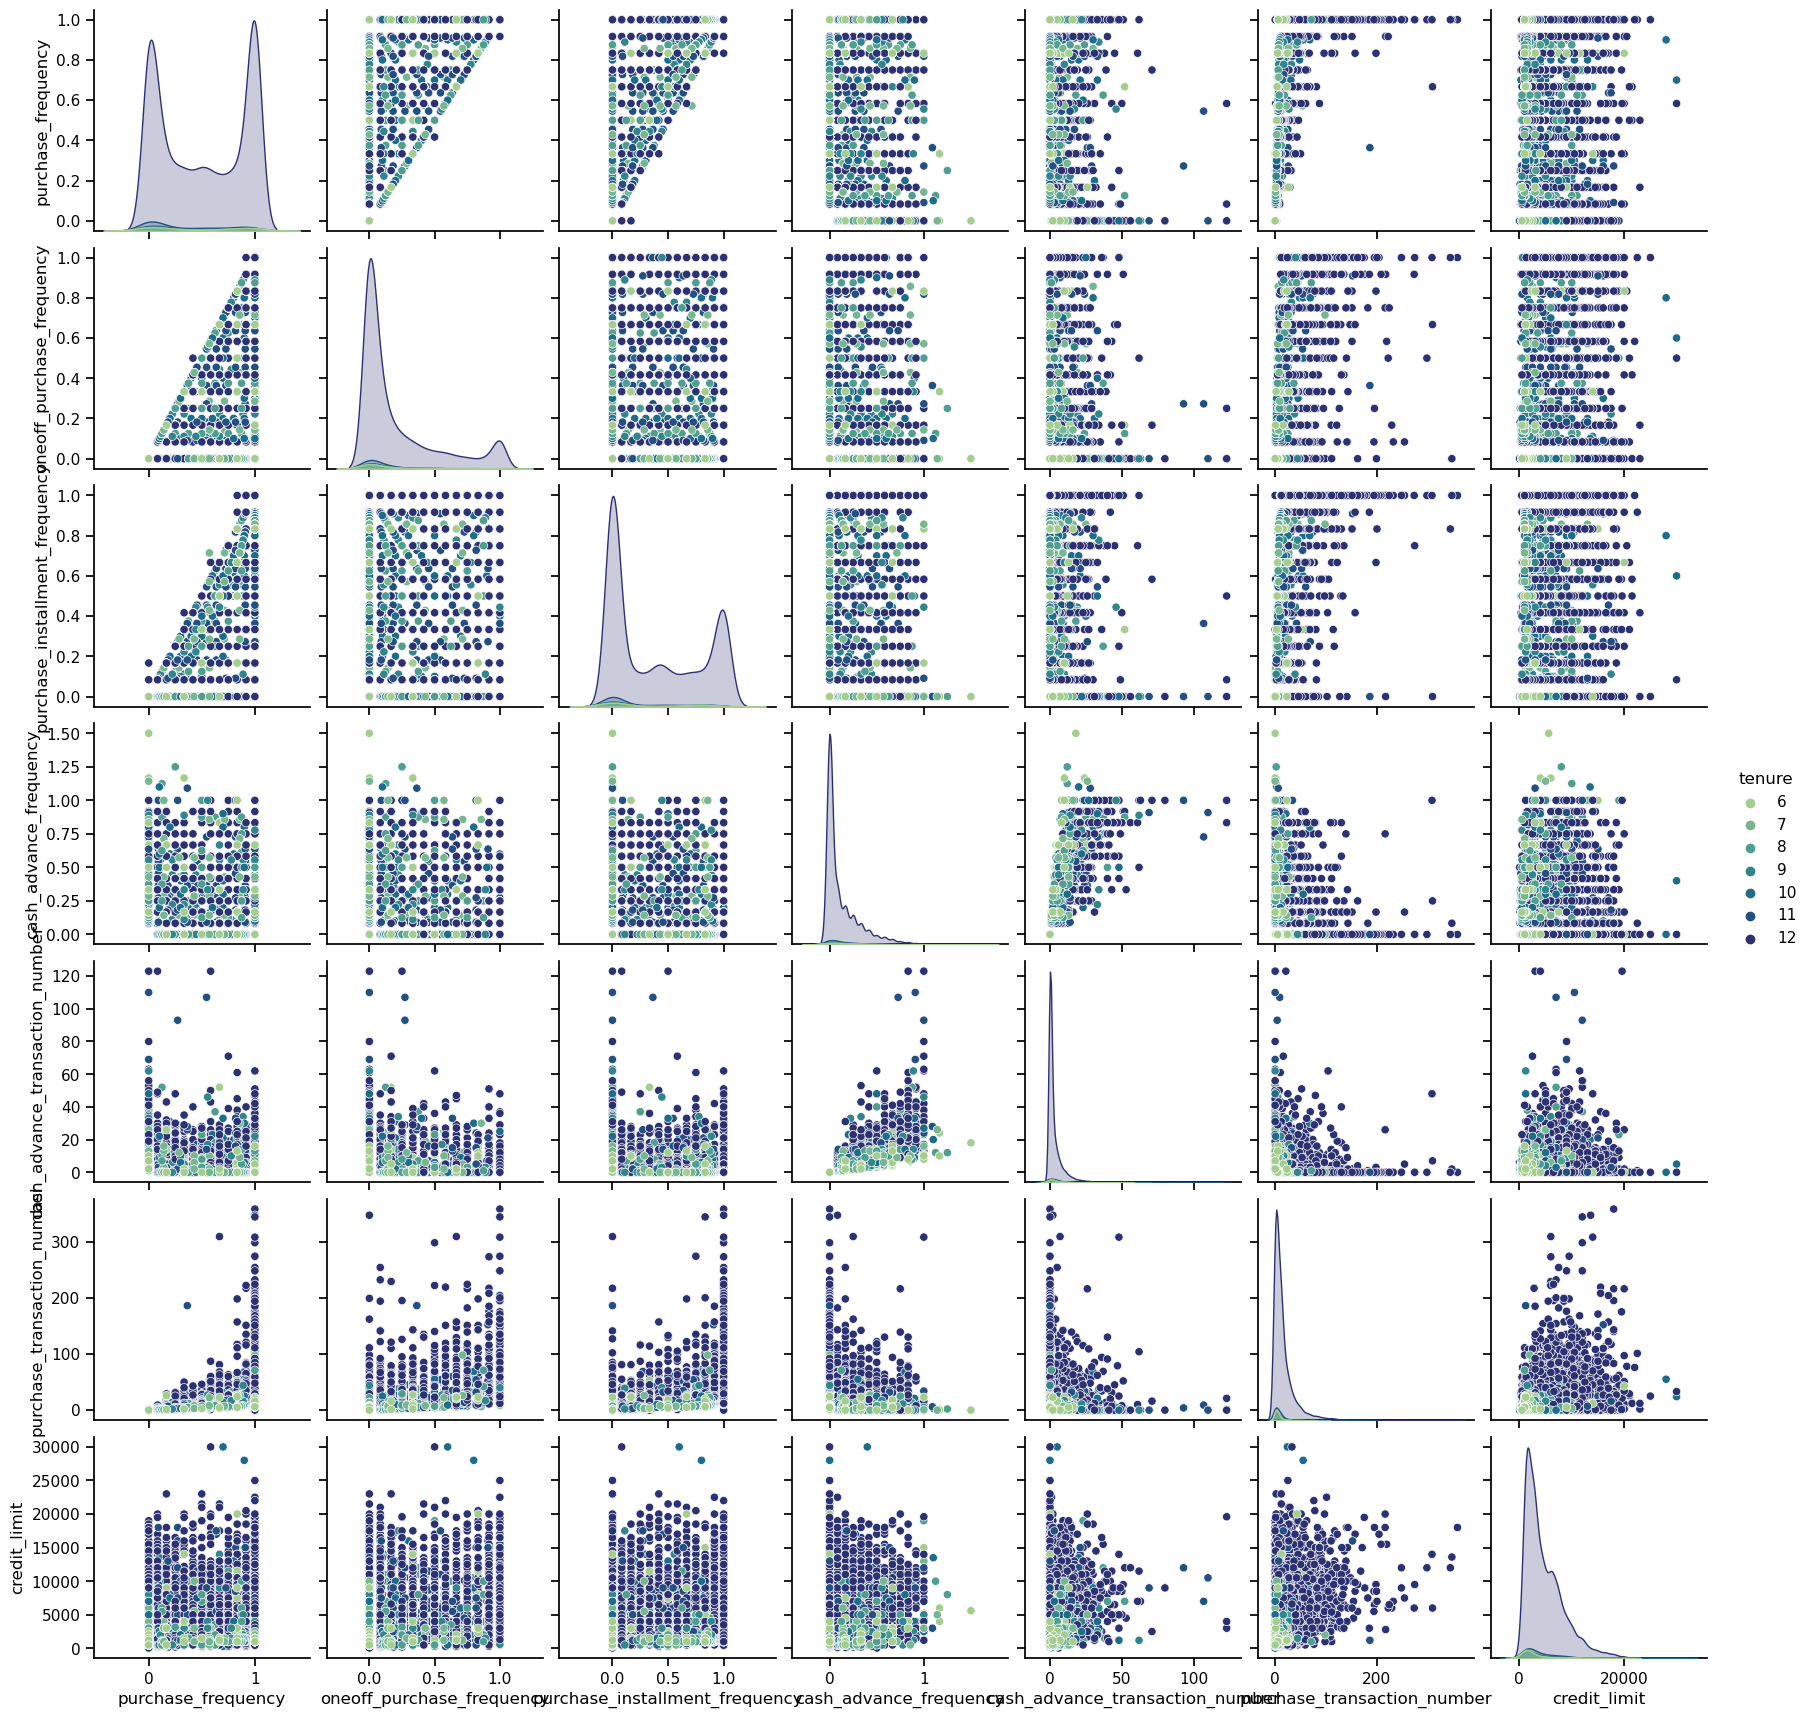

In [53]:
sns.pairplot(data = df_pf, hue="tenure", palette="crest")

* longer tenure customers tend to have more purchase bahaviours.
* higher purchase frequency is linked with higher oneoff purchase frequency and installment purchase frequency

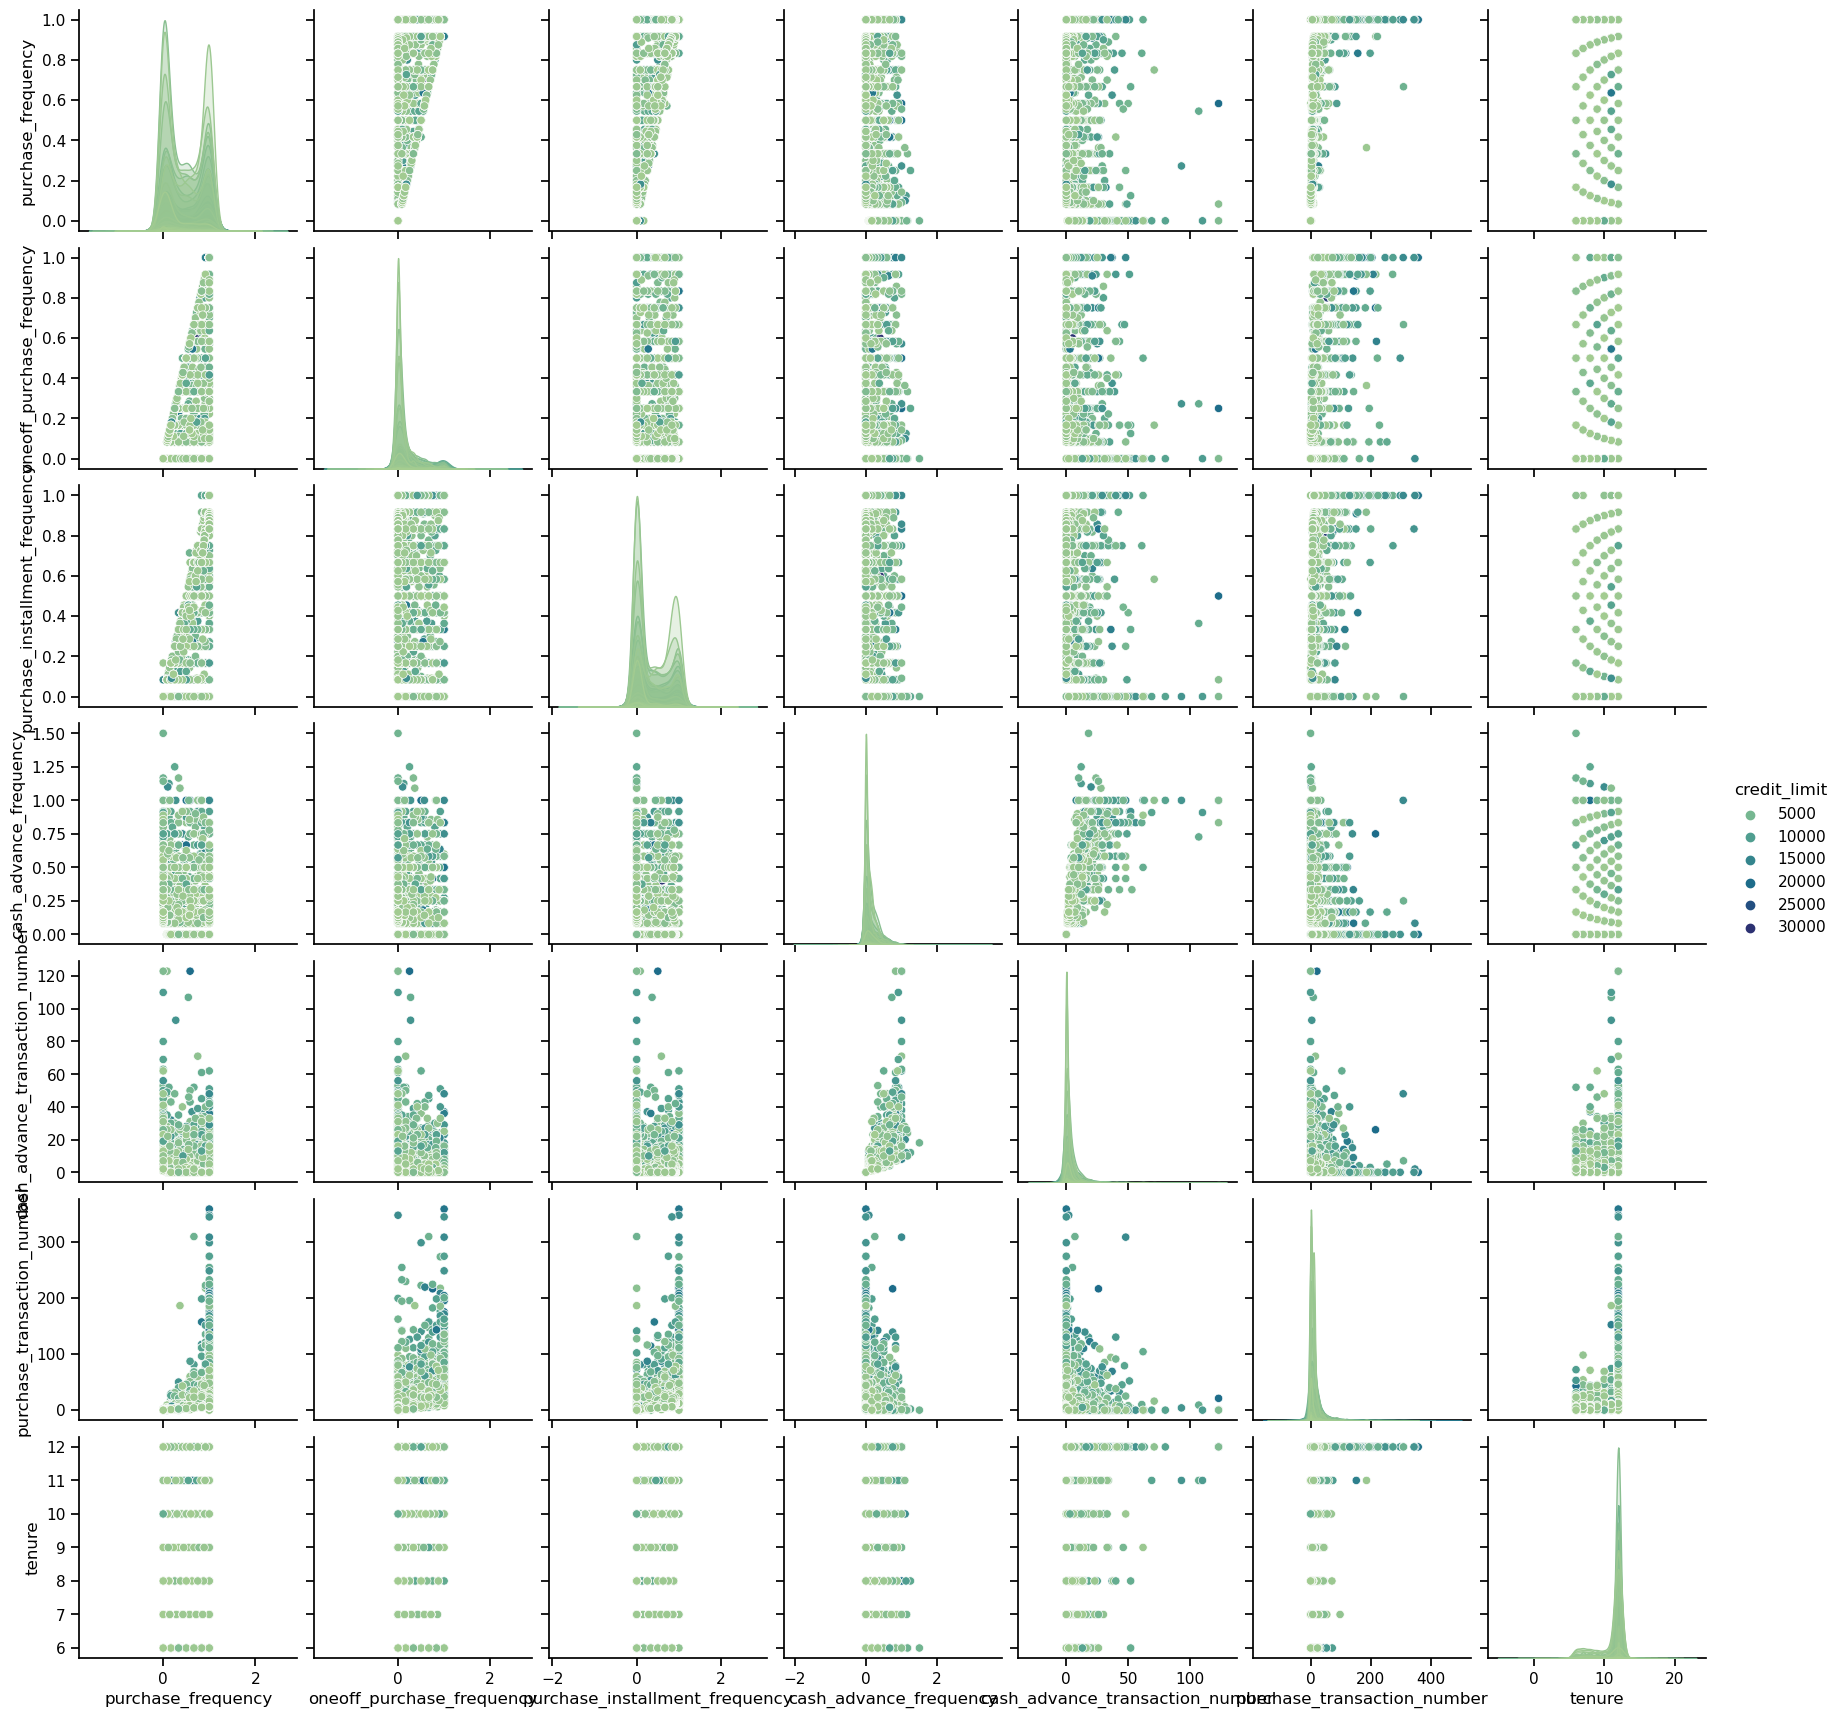

In [54]:
sns.pairplot(data = df_pf, hue="credit_limit", palette="crest")

* for freqency attributes, pairplot provides limited information 
* it is clear that credit limit lacks as significant relationship with other attribtues as tenure

<AxesSubplot: >

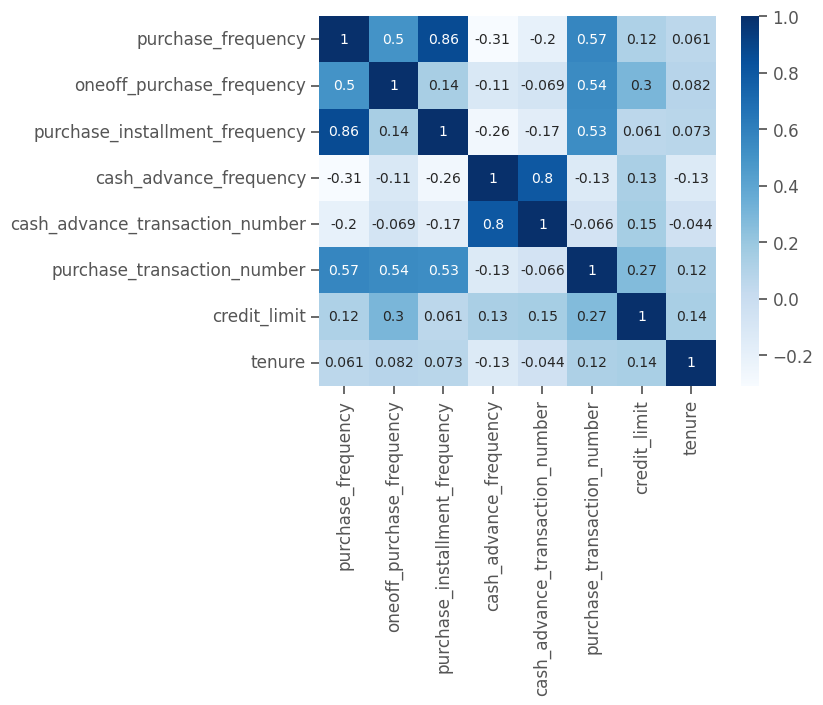

In [118]:
sns.heatmap(data=df_pf.corr(), cmap="Blues", annot=True)

* purchase transaction number is linked with installment frequency, oneoff frequency like purchase frequency.
* purchase frequency, purchase installment frequency, oneoff purchase, cash advance frequency requires further check

/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/3677826224.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_pf["oneoff_purchase_frequency"], color="green", ax=axis[0],shade=True);
/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/3677826224.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_pf["purchase_frequency"], color="blue", ax=axis[0], shade=True )
/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/3677826224.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_pf["purchase_installment_frequency"], color="green", ax=axis[1],shade=True);
/var/f

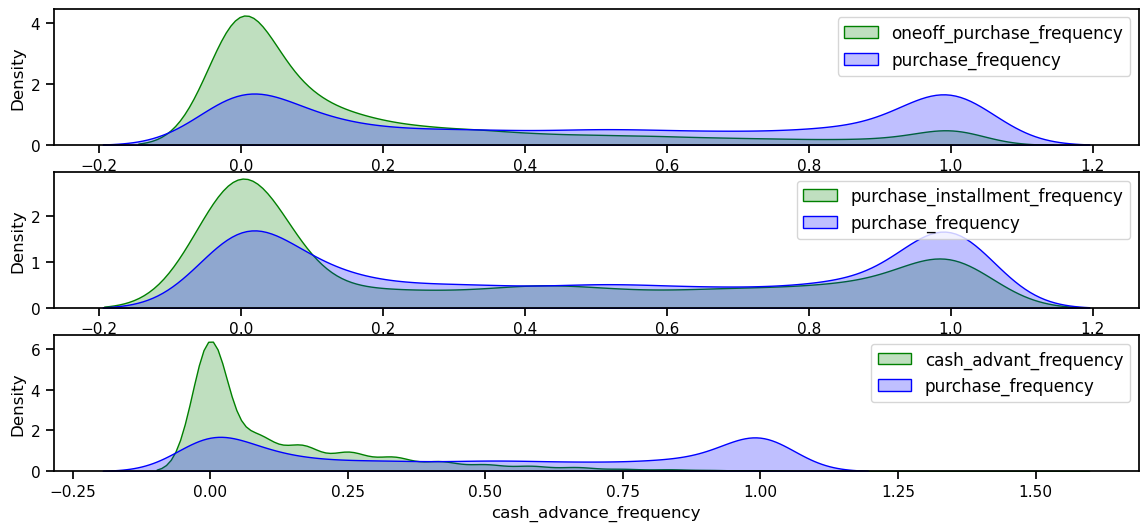

In [56]:
fig, axis = plt.subplots(3,1, figsize=(14, 6))
sns.set_context('notebook', font_scale=1.1)

ax = sns.kdeplot(df_pf["oneoff_purchase_frequency"], color="green", ax=axis[0],shade=True);
ax = sns.kdeplot(df_pf["purchase_frequency"], color="blue", ax=axis[0], shade=True )
ax.legend(["oneoff_purchase_frequency", "purchase_frequency"], loc="upper right")
ax.set_xlabel("oneoff_purchase_frequency")

ax = sns.kdeplot(df_pf["purchase_installment_frequency"], color="green", ax=axis[1],shade=True);
ax = sns.kdeplot(df_pf["purchase_frequency"], color="blue", ax=axis[1], shade=True) 
ax.legend(["purchase_installment_frequency", "purchase_frequency"], loc="upper right")

ax = sns.kdeplot(df_pf["cash_advance_frequency"], color="green", ax=axis[2],shade=True);
ax = sns.kdeplot(df_pf["purchase_frequency"], color="blue", ax=axis[2], shade=True) 
ax.legend(["cash_advant_frequency", "purchase_frequency"], loc="upper right")

* cash advant frequency is not as related with purchase frequency as purchase installment frequency and oneoff purchase
* further check 
* For frequency attibutes, density plot is a better choice.

<Figure size 300x300 with 0 Axes>

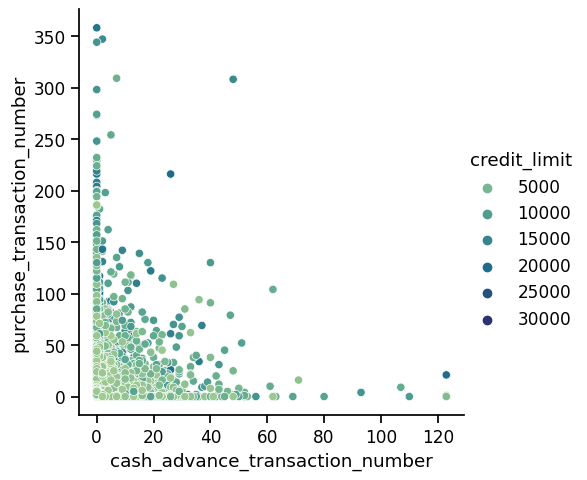

In [57]:
plt.figure(figsize=(3,3))
sns.relplot(data=df_pf, x="cash_advance_transaction_number", y="purchase_transaction_number", hue = "credit_limit", palette="crest")

* cash_advance has slightly negative relationship with purchase frequency
* Customers with higher credit limit tends to hace more purchase transaction number or cash advance number

In [58]:
df_pf.head(5)

purchase_frequency  oneoff_purchase_frequency  \
0            0.166667                   0.000000   
1            0.000000                   0.000000   
2            1.000000                   1.000000   
3            0.083333                   0.083333   
4            0.083333                   0.083333   

   purchase_installment_frequency  cash_advance_frequency  \
0                        0.083333                0.000000   
1                        0.000000                0.250000   
2                        0.000000                0.000000   
3                        0.000000                0.083333   
4                        0.000000                0.000000   

   cash_advance_transaction_number  purchase_transaction_number  credit_limit  \
0                                0                            2        1000.0   
1                                4                            0        7000.0   
2                                0                           12        7500.0   
3                                1                            1        7500.0   
4                                0                            1        1200.0   

   tenure  
0      12  
1      12  
2      12  
3      12  
4      12

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, '0.0'),
  Text(1, 0, '0.083333'),
  Text(2, 0, '0.090909'),
  Text(3, 0, '0.1'),
  Text(4, 0, '0.111111'),
  Text(5, 0, '0.125'),
  Text(6, 0, '0.142857'),
  Text(7, 0, '0.166667'),
  Text(8, 0, '0.181818'),
  Text(9, 0, '0.2'),
  Text(10, 0, '0.222222'),
  Text(11, 0, '0.25'),
  Text(12, 0, '0.272727'),
  Text(13, 0, '0.285714'),
  Text(14, 0, '0.3'),
  Text(15, 0, '0.333333'),
  Text(16, 0, '0.363636'),
  Text(17, 0, '0.375'),
  Text(18, 0, '0.4'),
  Text(19, 0, '0.416667'),
  Text(20, 0, '0.428571'),
  Text(21, 0, '0.444444'),
  Text(22, 0, '0.454545'),
  Text(23, 0, '0.5'),
  Text(24, 0, '0.545455'),
  Text(25, 0, '0.555556'),
  Text(26, 0, '0.571429'),
  Text(27, 0, '0.583333'),
  Text(28, 0, '0.6'),

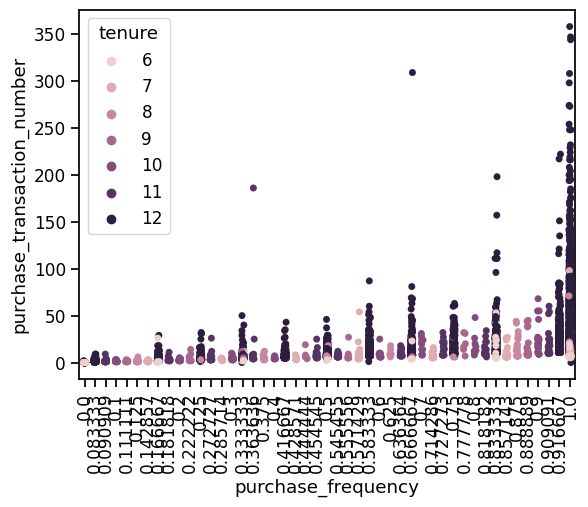

In [59]:
# further check tenure
sns.stripplot(data=df_pf, x="purchase_frequency", y="purchase_transaction_number", hue="tenure")
plt.xticks(rotation = 90)

* longer tenure tends to have more purchase transaction number and higher purchase frequency comparing to customers with shorter tenure

#### Conclusion:
* tenure: Longer tenure custoemrs tend to have more purchase behaviours and more transaction number.
* transaction: transaction number is linked with purchase frequency.
* purchase type: 
    * cash advance frequency is negatively linked with purchase behaviour and it is also less related with installment and oneoff purchase
    * purchase behaviour is positively related with oneoff purchase and install purchase

### payment

In [60]:
df_p.head(5)

payment  minimum_payment  percent_full_payment  credit_limit  tenure
0   201.802084       139.509787              0.000000        1000.0      12
1  4103.032597      1072.340217              0.222222        7000.0      12
2   622.066742       627.284787              0.000000        7500.0      12
3     0.000000       312.452292              0.000000        7500.0      12
4   678.334763       244.791237              0.000000        1200.0      12

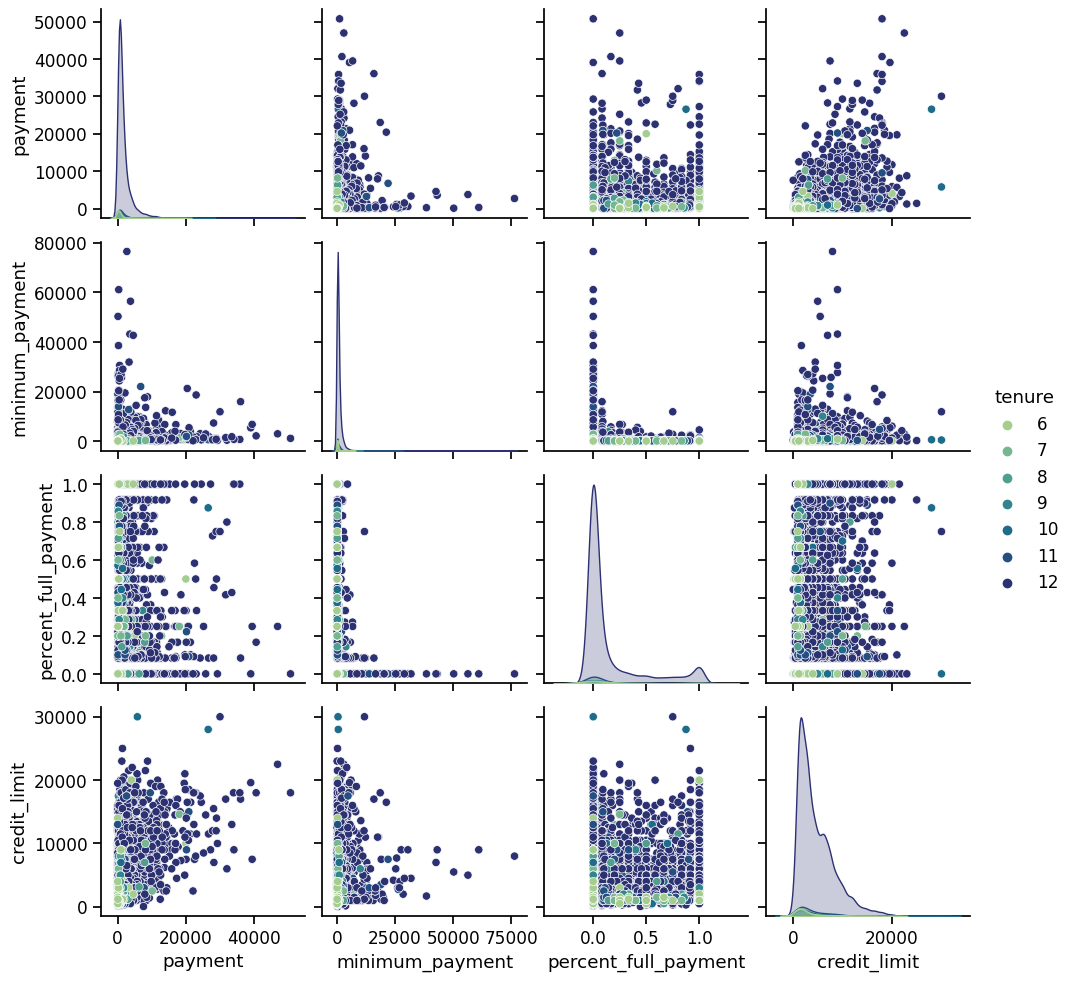

In [61]:
sns.pairplot(data=df_p, palette="crest", hue="tenure")

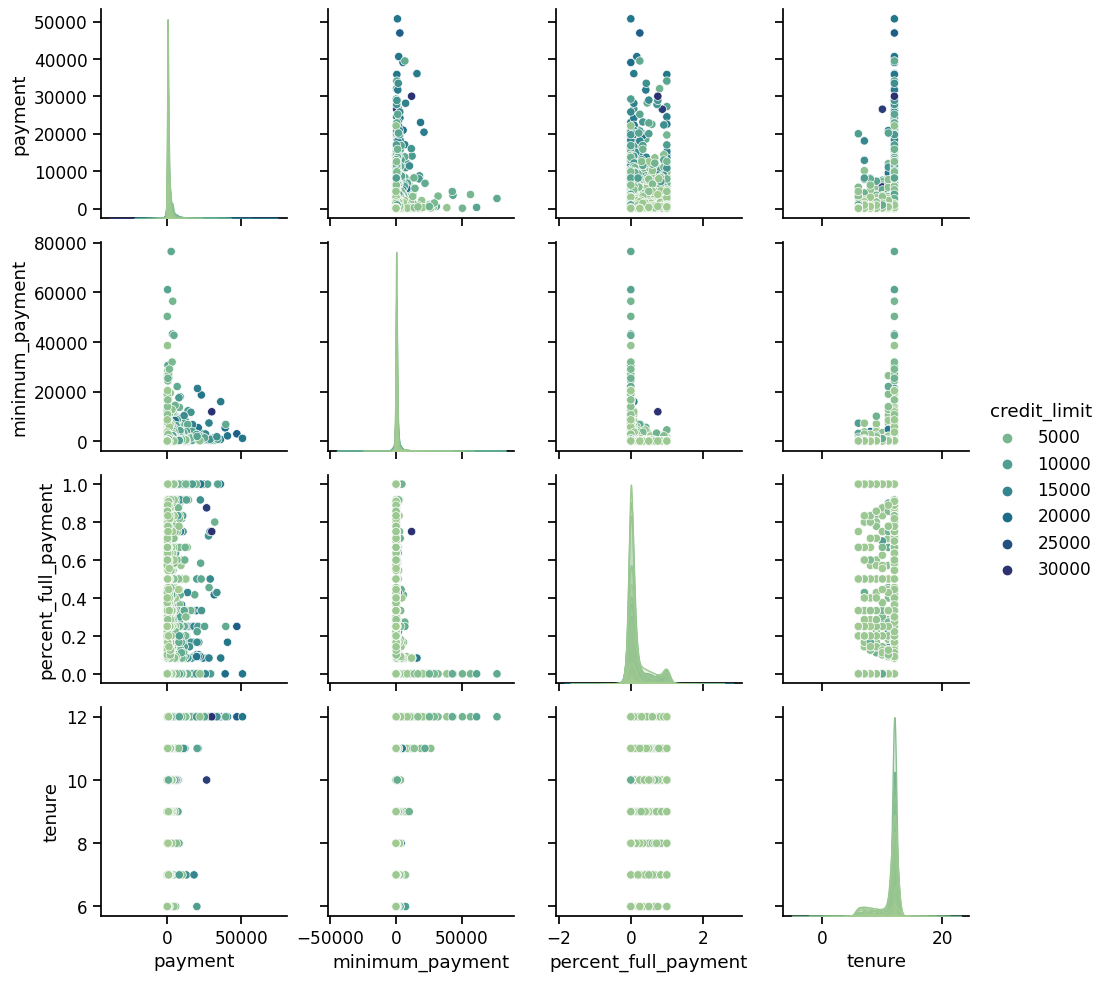

In [62]:
sns.pairplot(data=df_p, palette="crest", hue="credit_limit")

<AxesSubplot: >

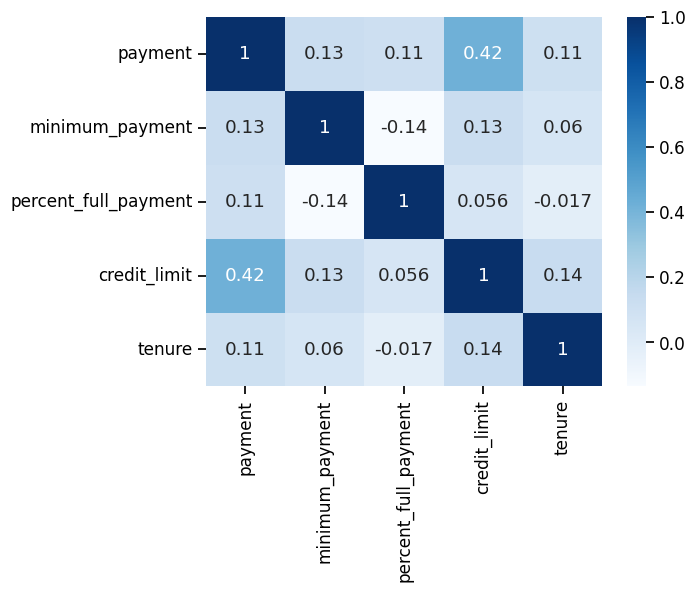

In [63]:
sns.heatmap(data = df_p.corr(), cmap="Blues", annot=True)

* There are only some relationships that have been found.

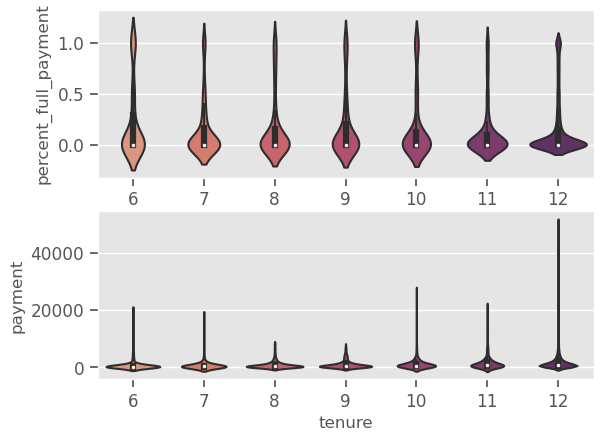

In [103]:
fig, axis = plt.subplots(2, 1)
ax = sns.violinplot(y='percent_full_payment', x="tenure",  data=df_p, ax=axis[0], palette='flare')
ax = sns.violinplot(y = 'payment', x='tenure', data=df_p , ax=axis[1], palette='flare')

* Customers with higher tenure tends to have less full payment which indicates their purchase behaviour is more stable and less impulsive.

/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/2476311917.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df_p, x="percent_full_payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[0])
/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/2476311917.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df_p, x="percent_full_payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[0])
/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/ipykernel_36661/2476311917.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df_p, x="percent_full_payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[0])
/var/folders/5r/zbxqg81s2b584n57ykhl5x500000gn/T/

<AxesSubplot: xlabel='payment', ylabel='Density'>

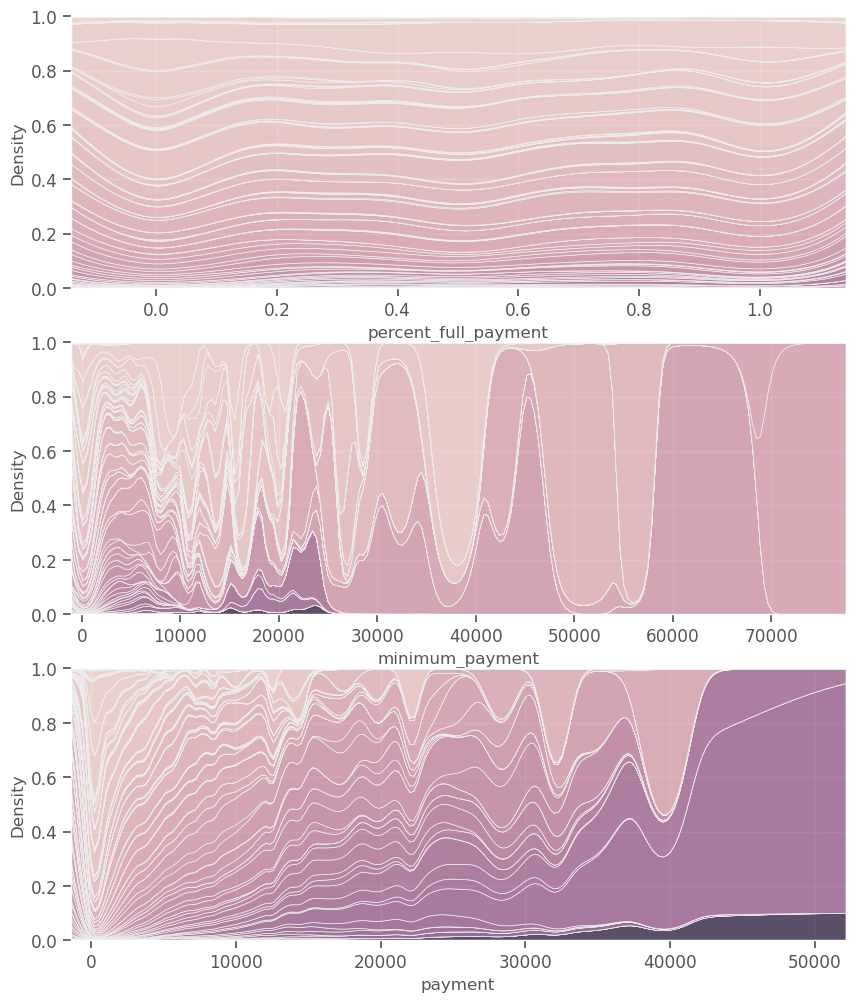

In [114]:
fig, axis = plt.subplots(3, 1, figsize=(10,12))
ax = sns.kdeplot(data=df_p, x="percent_full_payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[0])
ax = sns.kdeplot(data=df_p, x="minimum_payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[1])
sns.kdeplot(data=df_p, x="payment", hue="credit_limit", multiple="fill", legend=False, ax=axis[2])
# The legend is too long since there are so many values in credit_limit
# darker color, higher credit limit

* customers with higher credit limit tend to have very small percent of full payment, which indicate they have more stable spending habit.
* Their minimum payment suprisingly have lower compared to other customers with lower credit limit.
* Their payment are higher than other customers generally, yet the density is lower than middle credit limit customers, which may indicate that their payment habit is more conservative.

<AxesSubplot: xlabel='percent_full_payment', ylabel='Density'>

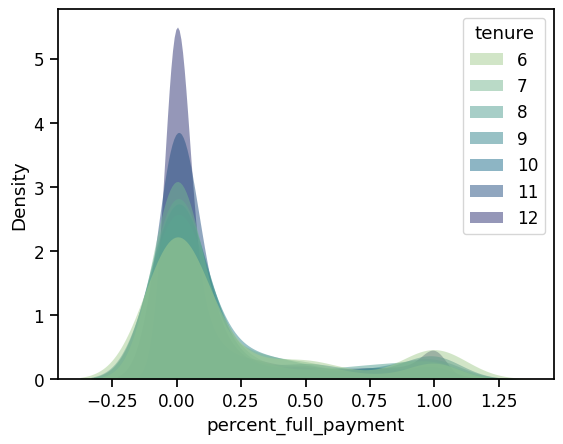

In [66]:
sns.kdeplot(data=df_p, x="percent_full_payment", 
            hue="tenure", fill=True, common_norm=False, 
            palette='crest', alpha=.5, linewidth=0)

## Model building

### PCA

In [67]:
pca = PCA(n_components=10)
pca.fit_transform(x)

array([[-1.68376780e+00, -1.07256996e+00,  4.77243657e-01, ...,
        -1.81955204e-02,  1.19089975e-01, -7.83150405e-02],
       [-1.13484630e+00,  2.50873805e+00,  6.03529143e-01, ...,
         1.76700220e-01,  6.75836224e-01, -7.78006030e-01],
       [ 9.69060364e-01, -3.83487471e-01,  9.26482605e-02, ...,
        -2.30295905e-01, -8.68962721e-01, -1.76822378e-03],
       ...,
       [-9.28481555e-01, -1.80772394e+00, -4.64896081e-01, ...,
        -3.00335603e-01,  8.04950965e-01, -8.28232164e-01],
       [-2.33744203e+00, -6.53444717e-01,  9.76833698e-01, ...,
         2.23699545e-01,  1.20072939e+00,  2.70437436e-01],
       [-5.57577751e-01, -4.00281046e-01,  1.02684636e+00, ...,
        -4.12872241e-01, -8.38682823e-01,  3.48111183e-01]])

#### identify the number of n

Text(0.5, 1.0, 'Scree Plot')

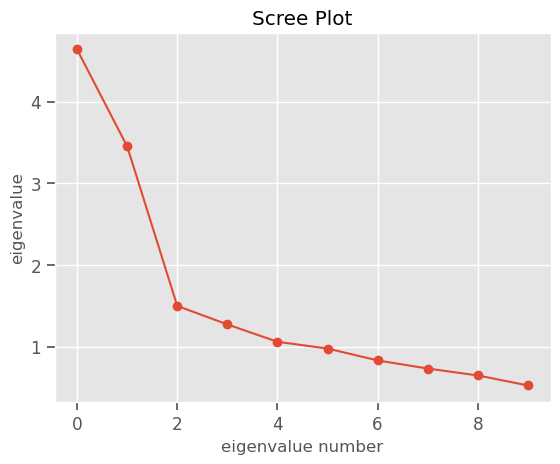

In [68]:
plt.style.use('ggplot')
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel('eigenvalue number')
plt.ylabel('eigenvalue')
plt.title('Scree Plot')

When eigenvalue > 1, the elbow point is 2 or 3.

Text(0.5, 1.0, 'Scree Plot')

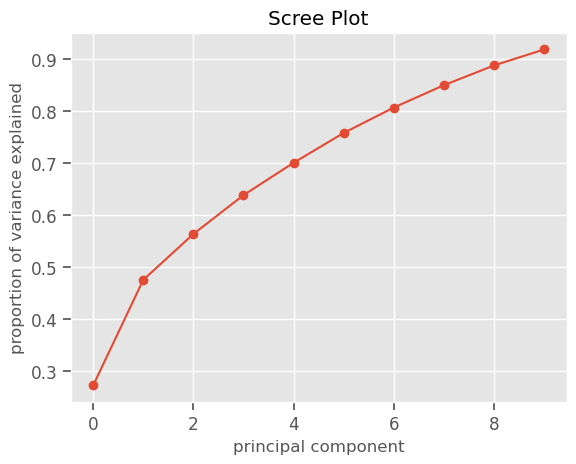

In [69]:
# check the pc values based on the variance pcs exlained
var = np.cumsum(pca.explained_variance_ratio_)
plt.style.use('ggplot')
plt.plot(var, marker='o')
plt.xlabel('principal component')
plt.ylabel('proportion of variance explained')
plt.title('Scree Plot')

* When n = 9, principle components are able to describe nearly 95% of the variance.
* However, the biggest slope appears at 2
* Also,for the aim to visualize the data, I will stick with 2 principle components

#### implement pca

In [70]:
pca = PCA(n_components=2)
pca_val = pca.fit_transform(x)
x['c1'] = [item[0] for item in pca_val]
x['c2'] = [item[1] for item in pca_val]
x

balance  balance_frequency  purchase  oneoff_purchase  \
0    -0.732054          -0.249881 -0.424934        -0.356957   
1     0.786858           0.134049 -0.469584        -0.356957   
2     0.447041           0.517980 -0.107716         0.108843   
3     0.049015          -1.017743  0.231995         0.546123   
4    -0.358849           0.517980 -0.462095        -0.347317   
...        ...                ...       ...              ...   
8944 -0.738015           0.517980 -0.333331        -0.356957   
8945 -0.742488           0.517980 -0.329174        -0.356957   
8946 -0.740463          -0.185895 -0.402000        -0.356957   
8947 -0.745239          -0.185895 -0.469584        -0.356957   
8948 -0.572644          -0.889766  0.042092         0.301677   

      installment_purchase  cash_advance  purchase_frequency  \
0                -0.349114     -0.466805           -0.806649   
1                -0.454607      2.605438           -1.221928   
2                -0.454607     -0.466805            1.269742   
3                -0.454607     -0.368678           -1.014290   
4                -0.454607     -0.466805           -1.014290   
...                    ...           ...                 ...   
8944             -0.132688     -0.466805            1.269742   
8945             -0.122869     -0.466805            1.269742   
8946             -0.294930     -0.466805            0.854463   
8947             -0.454607     -0.449373           -1.221928   
8948             -0.454607     -0.406228            0.439186   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                     -0.678716                       -0.707409   
1                     -0.678716                       -0.917090   
2                      2.673295                       -0.917090   
3                     -0.399383                       -0.917090   
4                     -0.399383                       -0.917090   
...                         ...                             ...   
8944                  -0.678716                        1.179720   
8945                  -0.678716                        1.179720   
8946                  -0.678716                        0.760359   
8947                  -0.678716                       -0.917090   
8948                   1.555959                       -0.917090   

      cash_advance_frequency  cash_advance_transaction_number  \
0                  -0.675294                        -0.476083   
1                   0.573949                         0.110032   
2                  -0.675294                        -0.476083   
3                  -0.258882                        -0.329554   
4                  -0.675294                        -0.476083   
...                      ...                              ...   
8944               -0.675294                        -0.476083   
8945               -0.675294                        -0.476083   
8946               -0.675294                        -0.476083   
8947                0.157536                        -0.183026   
8948                0.990362                        -0.183026   

      purchase_transaction_number  credit_limit   payment  minimum_payment  \
0                       -0.511381     -0.960380 -0.529026        -0.302427   
1                       -0.591841      0.688601  0.818546         0.097453   
2                       -0.109082      0.826016 -0.383857        -0.093330   
3                       -0.551611      0.826016 -0.598733        -0.228291   
4                       -0.551611     -0.905414 -0.364421        -0.257295   
...                           ...           ...       ...              ...   
8944                    -0.350461     -0.960380 -0.486266        -0.341275   
8945                    -0.350461     -0.960380 -0.503445        -0.228291   
8946                    -0.390691     -0.960380 -0.570660        -0.326900   
8947                    -0.591841     -1.097795 -0.580581        -0.338330   
8948                     

In [71]:
x.iloc[:, :-2]

balance  balance_frequency  purchase  oneoff_purchase  \
0    -0.732054          -0.249881 -0.424934        -0.356957   
1     0.786858           0.134049 -0.469584        -0.356957   
2     0.447041           0.517980 -0.107716         0.108843   
3     0.049015          -1.017743  0.231995         0.546123   
4    -0.358849           0.517980 -0.462095        -0.347317   
...        ...                ...       ...              ...   
8944 -0.738015           0.517980 -0.333331        -0.356957   
8945 -0.742488           0.517980 -0.329174        -0.356957   
8946 -0.740463          -0.185895 -0.402000        -0.356957   
8947 -0.745239          -0.185895 -0.469584        -0.356957   
8948 -0.572644          -0.889766  0.042092         0.301677   

      installment_purchase  cash_advance  purchase_frequency  \
0                -0.349114     -0.466805           -0.806649   
1                -0.454607      2.605438           -1.221928   
2                -0.454607     -0.466805            1.269742   
3                -0.454607     -0.368678           -1.014290   
4                -0.454607     -0.466805           -1.014290   
...                    ...           ...                 ...   
8944             -0.132688     -0.466805            1.269742   
8945             -0.122869     -0.466805            1.269742   
8946             -0.294930     -0.466805            0.854463   
8947             -0.454607     -0.449373           -1.221928   
8948             -0.454607     -0.406228            0.439186   

      oneoff_purchase_frequency  purchase_installment_frequency  \
0                     -0.678716                       -0.707409   
1                     -0.678716                       -0.917090   
2                      2.673295                       -0.917090   
3                     -0.399383                       -0.917090   
4                     -0.399383                       -0.917090   
...                         ...                             ...   
8944                  -0.678716                        1.179720   
8945                  -0.678716                        1.179720   
8946                  -0.678716                        0.760359   
8947                  -0.678716                       -0.917090   
8948                   1.555959                       -0.917090   

      cash_advance_frequency  cash_advance_transaction_number  \
0                  -0.675294                        -0.476083   
1                   0.573949                         0.110032   
2                  -0.675294                        -0.476083   
3                  -0.258882                        -0.329554   
4                  -0.675294                        -0.476083   
...                      ...                              ...   
8944               -0.675294                        -0.476083   
8945               -0.675294                        -0.476083   
8946               -0.675294                        -0.476083   
8947                0.157536                        -0.183026   
8948                0.990362                        -0.183026   

      purchase_transaction_number  credit_limit   payment  minimum_payment  \
0                       -0.511381     -0.960380 -0.529026        -0.302427   
1                       -0.591841      0.688601  0.818546         0.097453   
2                       -0.109082      0.826016 -0.383857        -0.093330   
3                       -0.551611      0.826016 -0.598733        -0.228291   
4                       -0.551611     -0.905414 -0.364421        -0.257295   
...                           ...           ...       ...              ...   
8944                    -0.350461     -0.960380 -0.486266        -0.341275   
8945                    -0.350461     -0.960380 -0.503445        -0.228291   
8946                    -0.390691     -0.960380 -0.570660        -0.326900   
8947                    -0.591841     -1.097795 -0.580581        -0.338330   
8948                     

### KMeans

#### identify the number of k

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

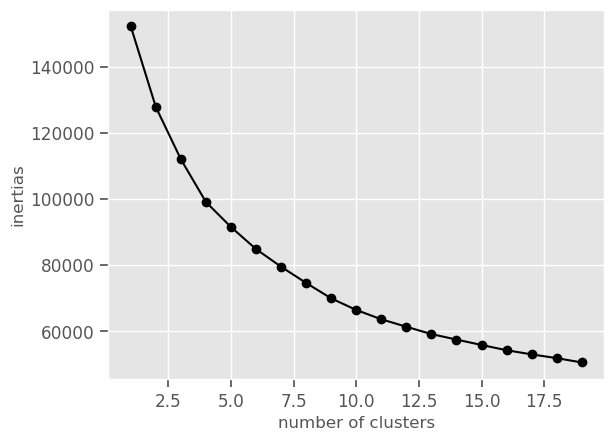

In [72]:
# first try all attributes except principle component columns
ks = range(1, 20)
inertias = []
for k in ks:
    k_model = KMeans(n_clusters=k)
    k_model.fit(x.iloc[:,:-2])
    inertias.append(k_model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters')
plt.ylabel('inertias')
plt.show()

* 8, maybe
* The elbow point is not very clear, which means that the elbow score is not enough.
* Try the pca attributes further

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

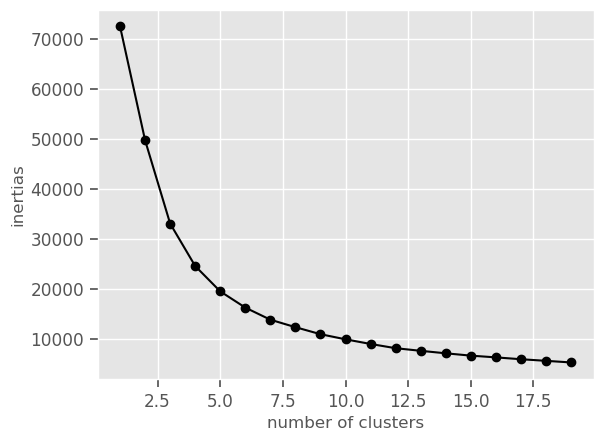

In [73]:
ks = range(1, 20)
inertias = []
for k in ks:
    k_model = KMeans(n_clusters=k)
    
    #select the pca columns
    k_model.fit(x.iloc[:,-2:])
    inertias.append(k_model.inertia_)
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters')
plt.ylabel('inertias')
plt.show()

* Using principle components columns is more clear than using all attributes.
* it is 3 or 4

In [152]:
X = x.iloc[:, -2:]
X

c1        c2
0    -1.683766 -1.072571
1    -1.134847  2.508729
2     0.969043 -0.383519
3    -0.888418  0.004396
4    -1.600262 -0.684053
...        ...       ...
8944 -0.362124 -2.012991
8945 -0.580359 -1.675230
8946 -0.928480 -1.807722
8947 -2.337434 -0.653429
8948 -0.557580 -0.400276

[8949 rows x 2 columns]

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: x and y must have same first dimension, but have shapes (8,) and (0,)

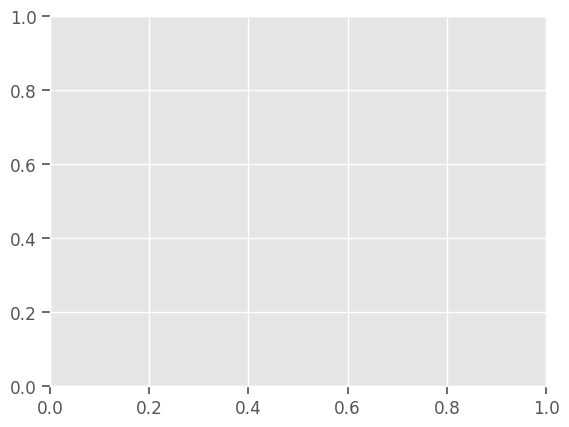

In [153]:
kmeans_models = [KMeans(n_clusters=k).fit(X) in range(1, 10)]
davies_bouldin_scores = [davies_bouldin_score(X, model.labels_) for model in kmeans_models[1: 10]]
plt.plot(range(1,9), davies_bouldin_scores, 'bo-')
plt.title('davies_bouldin_score socres vs number of clusters')
plt.ylabel('db score')
plt.xlabel('number of k')
plt.show()

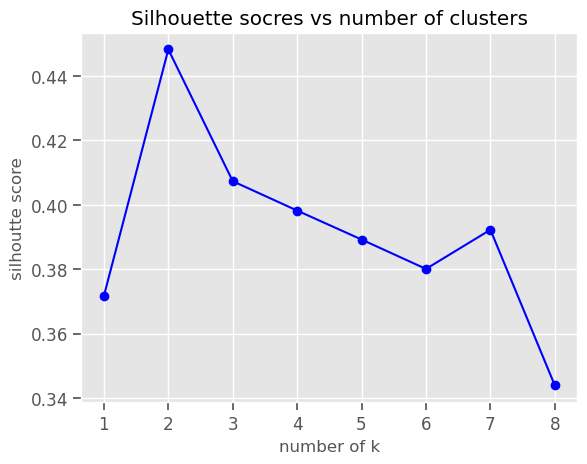

In [155]:
kmeans_models = [KMeans(n_clusters = k, n_init='auto').fit(x.iloc[:, -2:]) for k in range(1, 10)]
silhoutte_scores = [silhouette_score(x.iloc[:, -2:], model.labels_) for model in kmeans_models[1: 10]]
plt.plot(range(1,9), silhoutte_scores, 'bo-')
plt.title('Silhouette socres vs number of clusters')
plt.ylabel('silhoutte score')
plt.xlabel('number of k')
plt.show()

* The higher silhouette score, the better the number. At this point, 2 is better.
* However, 3 is where the score begins to stablize, which may indicate that from k=3, the number and shape of clusters may begin to be stable. 
* 4 is also a stable point. All 2, 3 and 4 will be tried.

#### build the clusters

##### k = 2

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='c1', ylabel='c2'>

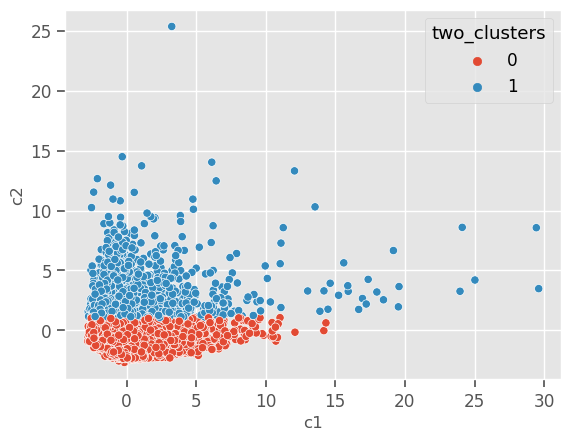

In [162]:
kmeans_model = KMeans(n_clusters=2, init = 'random')
kmeans_model.fit(x.iloc[:, -2:])
x["two_clusters"] = pd.Series(kmeans_model.predict(x.iloc[:, -2:]), index=x.index)
sns.scatterplot(data=x, x="c1", y="c2",  hue="two_clusters")

<AxesSubplot: xlabel='two_clusters', ylabel='count'>

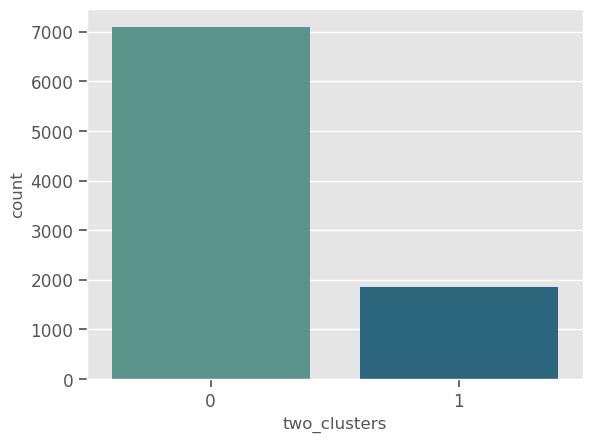

In [163]:
sns.countplot(data = x, x="two_clusters", palette="crest")

##### k =3

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='c1', ylabel='c2'>

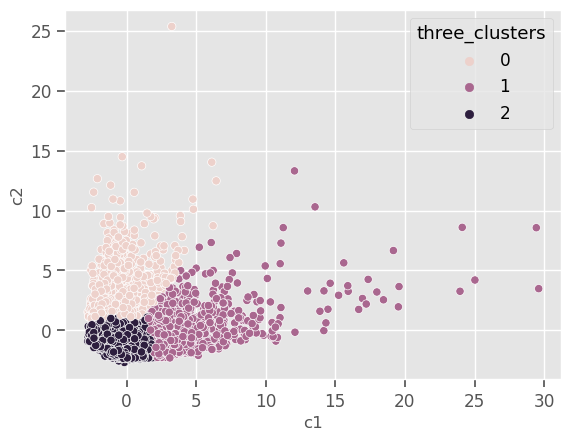

In [136]:
x = x.drop('two_clusters', axis=1)
kmeans_model = KMeans(n_clusters=3, init = 'random')
kmeans_model.fit(x.iloc[:, -2:])
x["three_clusters"] = pd.Series(kmeans_model.predict(x.iloc[:, -2:]), index=x.index)
sns.scatterplot(data=x, x="c1", y="c2",  hue="three_clusters")

<AxesSubplot: xlabel='three_clusters', ylabel='count'>

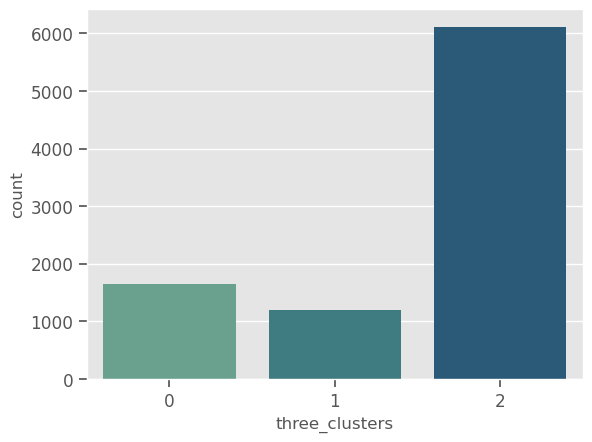

In [137]:
sns.countplot(data = x, x="three_clusters", palette="crest")

* three clusters seem to be too imbalanced

##### k = 4

In [138]:
x = x.drop("three_clusters", axis=1)
kmeans_model = KMeans(n_clusters=4, init = 'random')
kmeans_model.fit(x.iloc[:, -2:])
x["four_clusters"] = pd.Series(kmeans_model.predict(x.iloc[:, -2:]), index=x.index)

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='c1', ylabel='c2'>

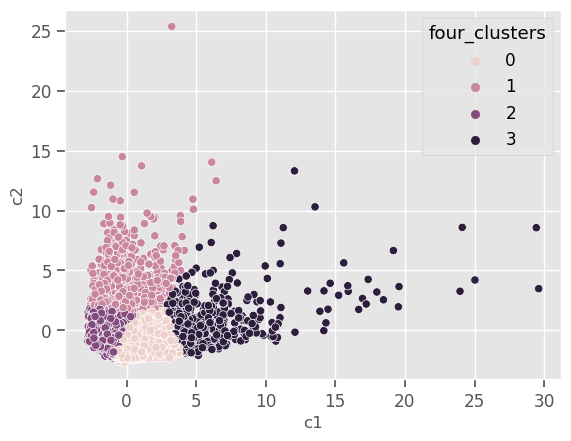

In [139]:
sns.scatterplot(data=x, x="c1", y="c2",  hue="four_clusters")

<AxesSubplot: xlabel='four_clusters', ylabel='count'>

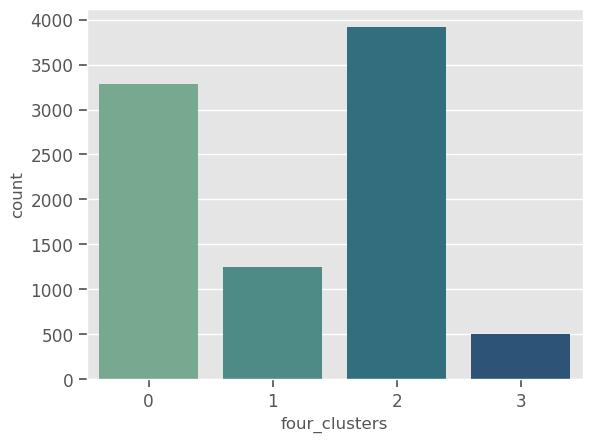

In [140]:
sns.countplot(data = x, x="four_clusters", palette="crest")

* the scatterplot based on principle components seems pretty good 
* the countplot shows that the distribution of clusters is a little bit imbalanced, but generally good.
* k = 4 is better than k = 3

#### evaluate the clusters

* Silhouette score: 
* Davies-Bouldin score:
* Calinski-Harabasz score: 

In [141]:
X = x.iloc[:, -3:-1]
X

c1        c2
0    -1.683766 -1.072571
1    -1.134847  2.508729
2     0.969043 -0.383519
3    -0.888418  0.004396
4    -1.600262 -0.684053
...        ...       ...
8944 -0.362124 -2.012991
8945 -0.580359 -1.675230
8946 -0.928480 -1.807722
8947 -2.337434 -0.653429
8948 -0.557580 -0.400276

[8949 rows x 2 columns]

In [142]:
def evaluate(x, y):
    s_score = round(silhouette_score(x, y), 3)
    db_score = round(davies_bouldin_score(x, y), 3)
    ch_score = round(calinski_harabasz_score(x,y), 3)
    print('Silhouette score: ', s_score)
    print('Davies-Bouldin score: ', db_score)
    print('Calinski harabasz score: ', ch_score)
    return s_score, db_score, ch_score

In [158]:
kmeans = KMeans(n_clusters=2)
kmeans_y = kmeans.fit_predict(X)
km2_ss, km2_db, km2_ch = evaluate(X, kmeans_y)

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score:  0.465
Davies-Bouldin score:  0.999
Calinski harabasz score:  4098.135


In [143]:
kmeans = KMeans(n_clusters=3)
kmeans_y = kmeans.fit_predict(X)
km3_ss, km3_db, km3_ch = evaluate(X, kmeans_y)

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score:  0.451
Davies-Bouldin score:  0.814
Calinski harabasz score:  5337.155


In [144]:
kmeans_y =KMeans(n_clusters=4).fit_predict(X)
km4_ss, km4_db, km4_ch = evaluate(X, kmeans_y)

/Users/yueqizhang/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score:  0.407
Davies-Bouldin score:  0.801
Calinski harabasz score:  5818.2


* The silhouette score and Davies-Bouldin score decreases with the increase of k, while the Calinski harabasz score increases.
* It may indicate that: 

### DBSCAN

* two hyperparameters: 
    * minpoints: the minimal points for one cluster: normally, it ought to be >n+1 (n dimension)
        * so, here it is 3
    * epsilon: below what number that it will be considered neighbors
        * it requires to check based on the distance
        * method: knn

#### identify the number of epsilon

In [82]:
knn = NearestNeighbors(n_neighbors=2)
knns = knn.fit(X)
distances, indices = knns.kneighbors(X)

In [83]:
# the distances to the closest neighbors
distances

array([[0.        , 0.00811078],
       [0.        , 0.08538992],
       [0.        , 0.02656579],
       ...,
       [0.        , 0.0354753 ],
       [0.        , 0.03765647],
       [0.        , 0.00599574]])

In [84]:
# sort the values of distances
distances = np.sort(distances, axis=0)
# choose the distance part, which is 1
distances = distances[:, 1]
distances

array([2.94373166e-04, 2.94373166e-04, 2.95142153e-04, ...,
       4.63695908e+00, 5.09023427e+00, 1.14398191e+01])

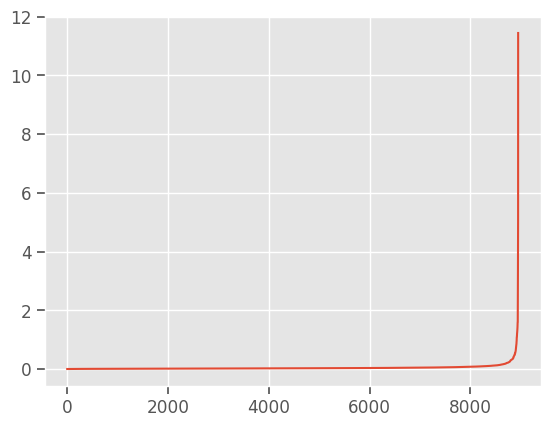

In [85]:
plt.plot(distances)

* it looks like 1. let's narrow the range of y to further check

(0.0, 0.5)

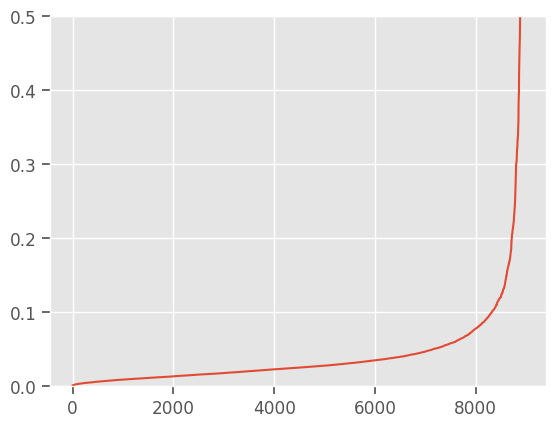

In [86]:
# y is too long, make it short
plt.plot(distances)
plt.ylim(0,0.5)

* The optimal point is where it has the max curve, so it is 0.1

In [87]:
dbscan_model = DBSCAN(eps = 0.1, min_samples = 3)
dbscan = dbscan_model.fit(X)
clusters = dbscan.labels_
# compute how many clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("number of clusters: ", n_clusters)

number of clusters:  130


* too many clusters, try epsilon = 1

In [88]:
dbscan_model = DBSCAN(eps = 1, min_samples = 3)
dbscan = dbscan_model.fit(X)
clusters = dbscan.labels_
# compute how many clusters
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("number of clusters: ", n_clusters)

number of clusters:  3


* better number, easy for visualization, choose epsilon = 1

In [89]:
X["clusters"] = clusters
X

c1        c2  clusters
0    -1.683766 -1.072571         0
1    -1.134847  2.508729         0
2     0.969043 -0.383519         0
3    -0.888418  0.004396         0
4    -1.600262 -0.684053         0
...        ...       ...       ...
8944 -0.362124 -2.012991         0
8945 -0.580359 -1.675230         0
8946 -0.928480 -1.807722         0
8947 -2.337434 -0.653429         0
8948 -0.557580 -0.400276         0

[8949 rows x 3 columns]

#### visualize different epsilon

<AxesSubplot: xlabel='c1', ylabel='c2'>

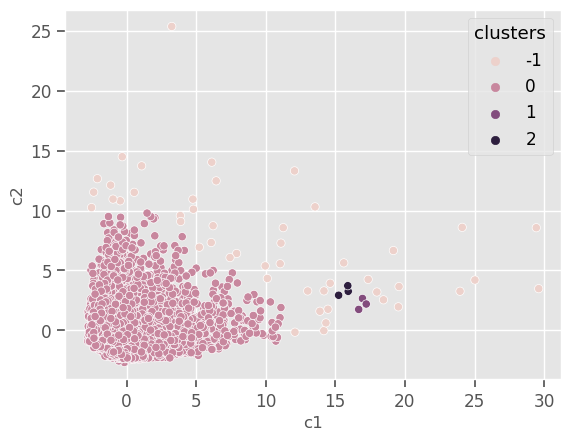

In [90]:
sns.scatterplot(x="c1", y="c2", data=X, hue="clusters")

* -1 is outliers, clearly that epsilon maybe too small, which makes it consider many points into outliers
* 1 and 2 are close, and they ought to be in the same group, try epsilon = 2

In [91]:
X = X.drop("clusters", axis=1)
dbscan_model = DBSCAN(eps = 2, min_samples = 3)
dbscan = dbscan_model.fit(X)
labels = dbscan.labels_
X["clusters"] = labels
X

c1        c2  clusters
0    -1.683766 -1.072571         0
1    -1.134847  2.508729         0
2     0.969043 -0.383519         0
3    -0.888418  0.004396         0
4    -1.600262 -0.684053         0
...        ...       ...       ...
8944 -0.362124 -2.012991         0
8945 -0.580359 -1.675230         0
8946 -0.928480 -1.807722         0
8947 -2.337434 -0.653429         0
8948 -0.557580 -0.400276         0

[8949 rows x 3 columns]

<AxesSubplot: xlabel='c1', ylabel='c2'>

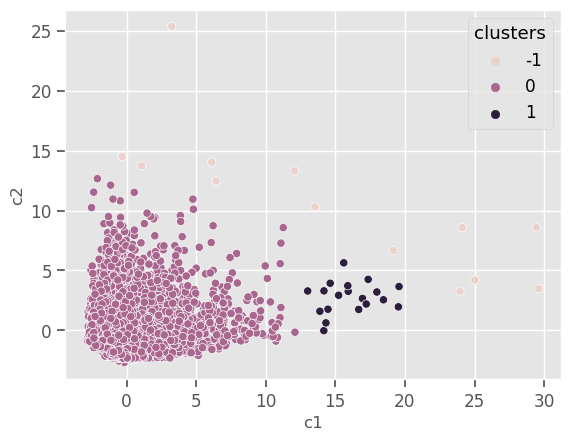

In [92]:
sns.scatterplot(x="c1", y="c2", data=X, hue="clusters")

* Better than the last one. -1 is the noise group, which is smaller. 0 and 1 are two clusters.
* However the group 0 seems to lack of discrimination
* try epsilon=0.1, which used to be thought to have too many clusters

<AxesSubplot: xlabel='c1', ylabel='c2'>

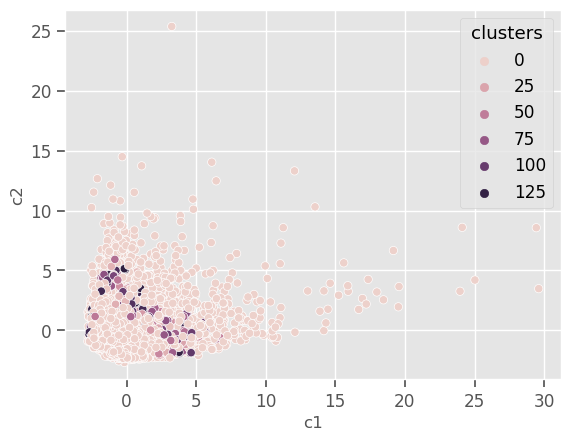

In [93]:
X = X.drop("clusters", axis=1)
dbscan_model = DBSCAN(eps = 0.1, min_samples = 3)
dbscan = dbscan_model.fit(X)
labels = dbscan.labels_
X["clusters"] = labels
sns.scatterplot(x="c1", y="c2", data=X, hue="clusters")

* okay, it looks much more terrible, too many outliers, which may be because:
    1. density based clusters are affected by outliers more significantly compared to partitional clustering like kmeans, which makes it more suitable for identify the main group in the dataset
    2. pca = 2, which may be small for density-based DBSCAN. Too few dimensions may restrain the dividing ability based on the density.

#### evaluate the model

* Both 0.1 epsilon and 1 epsilon generate too many outliers, and 1 epsilon also divide groups a bit unreasonably
* Therefore, the final choice is epsilon = 2.

In [94]:
X = X.drop("clusters", axis=1)
dbscan_model = DBSCAN(eps = 2, min_samples = 3)
dbscan = dbscan_model.fit(X)
dbscan_y = dbscan_model.fit_predict(X)

In [95]:
db_ss, db_db, db_ch = evaluate(X, dbscan_y)

Silhouette score:  0.803
Davies-Bouldin score:  1.323
Calinski harabasz score:  669.421


* silhouette score is higher tahn kmeans
* davies-bouldin is also higher
* clinski-harabasz is much lower than kmeans

### Hierarchical clustering